In [39]:
# Read csv and save to Rda
nano <- read.csv('nanoparticles.csv')[,-c(1,6)]
save(nano, file='nanoparticles.Rda')

In [164]:
# Load and inspect data
load('nanoparticles.Rda')
summary(nano)
head(nano)
str(nano)

       na               nb              naa              nab       
 Min.   :  0.00   Min.   :  0.00   Min.   :   1.0   Min.   :  0.0  
 1st Qu.: 72.00   1st Qu.: 41.00   1st Qu.: 338.0   1st Qu.:194.0  
 Median : 94.00   Median : 68.00   Median : 530.0   Median :272.0  
 Mean   : 94.54   Mean   : 68.52   Mean   : 572.1   Mean   :269.4  
 3rd Qu.:117.00   3rd Qu.: 93.00   3rd Qu.: 761.0   3rd Qu.:344.0  
 Max.   :207.00   Max.   :207.00   Max.   :2079.0   Max.   :632.0  
      nbb              mass           volume          energy      
 Min.   :   0.0   Min.   : 6163   Min.   : 6393   Min.   :-985.6  
 1st Qu.: 129.0   1st Qu.:14354   1st Qu.: 9092   1st Qu.:-903.4  
 Median : 302.0   Median :18834   Median :10800   Median :-728.3  
 Mean   : 348.2   Mean   :18987   Mean   :10889   Mean   :-727.1  
 3rd Qu.: 494.0   3rd Qu.:23414   3rd Qu.:12755   3rd Qu.:-618.0  
 Max.   :2054.0   Max.   :40382   Max.   :23589   Max.   :-421.9  

na  nb  naa nab nbb mass     volume    energy   
1 102  38 750 258 146 13399.92  7828.998 -618.9002
2  82 125 294 397 633 29198.36 13310.325 -950.6749
3 121  86 833 355 416 23879.13 12996.787 -922.5946
4  65  82 245 281 432 19811.60 10292.776 -658.7222
5  80  67 496 317 409 17766.10 10033.213 -663.7061
6 125  15 933 121  25 10262.83  9066.296 -604.8014

'data.frame':	6514 obs. of  8 variables:
 $ na    : int  102 82 121 65 80 125 87 55 115 29 ...
 $ nb    : int  38 125 86 82 67 15 120 137 92 136 ...
 $ naa   : int  750 294 833 245 496 933 455 131 725 63 ...
 $ nab   : int  258 397 355 281 317 121 412 301 408 194 ...
 $ nbb   : int  146 633 416 432 409 25 680 871 352 920 ...
 $ mass  : num  13400 29198 23879 19812 17766 ...
 $ volume: num  7829 13310 12997 10293 10033 ...
 $ energy: num  -619 -951 -923 -659 -664 ...


In [9]:
# Install libraries
install.packages('remotes')
install_github('rwehrens/ChemometricsWithR')
install.packages('chemometrics')
install.packages('car')

In [165]:
# Load libraries
library(remotes)
library(ChemometricsWithR)
library(IRdisplay)
library(chemometrics)
library(car)

png 
  2

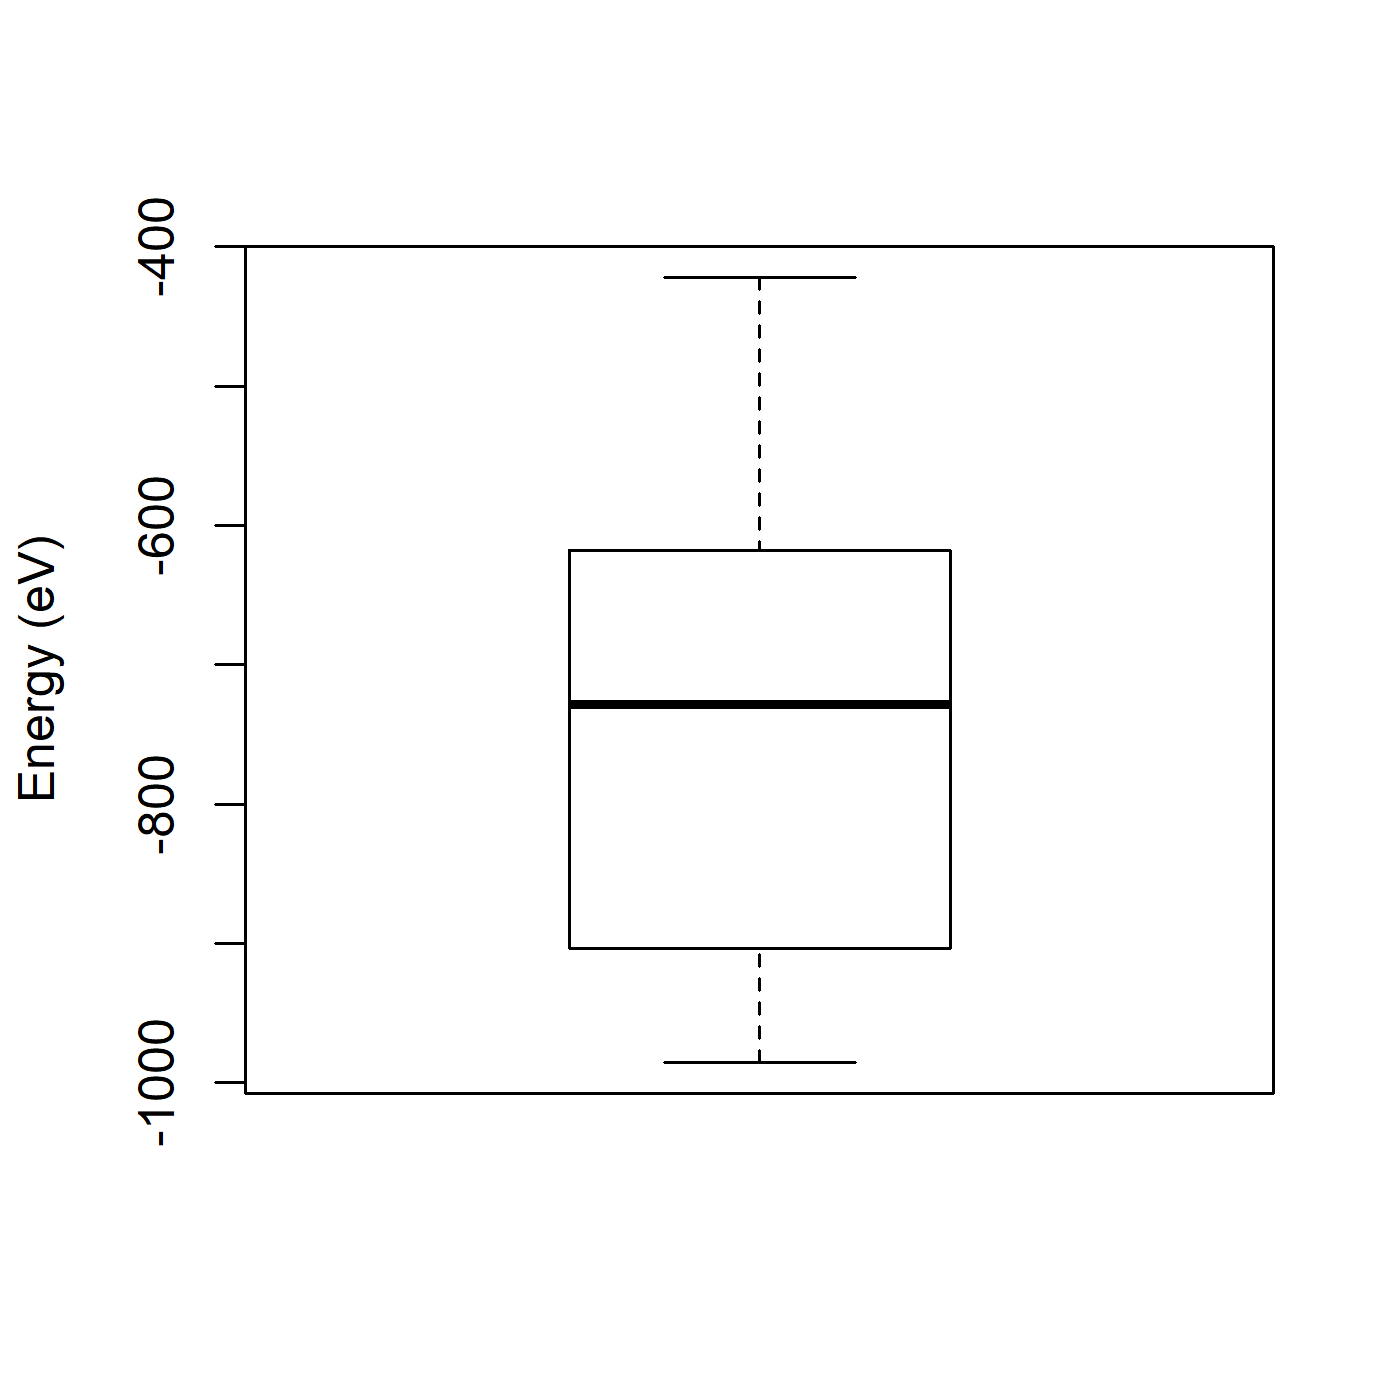

In [166]:
img <- 'energy_boxplot.png' 
png(img, width = 1400, height = 1400, res=300)
boxplot(nano$energy, ylab='Energy (eV)')
dev.off()
display_png(file=img) 

png 
  2

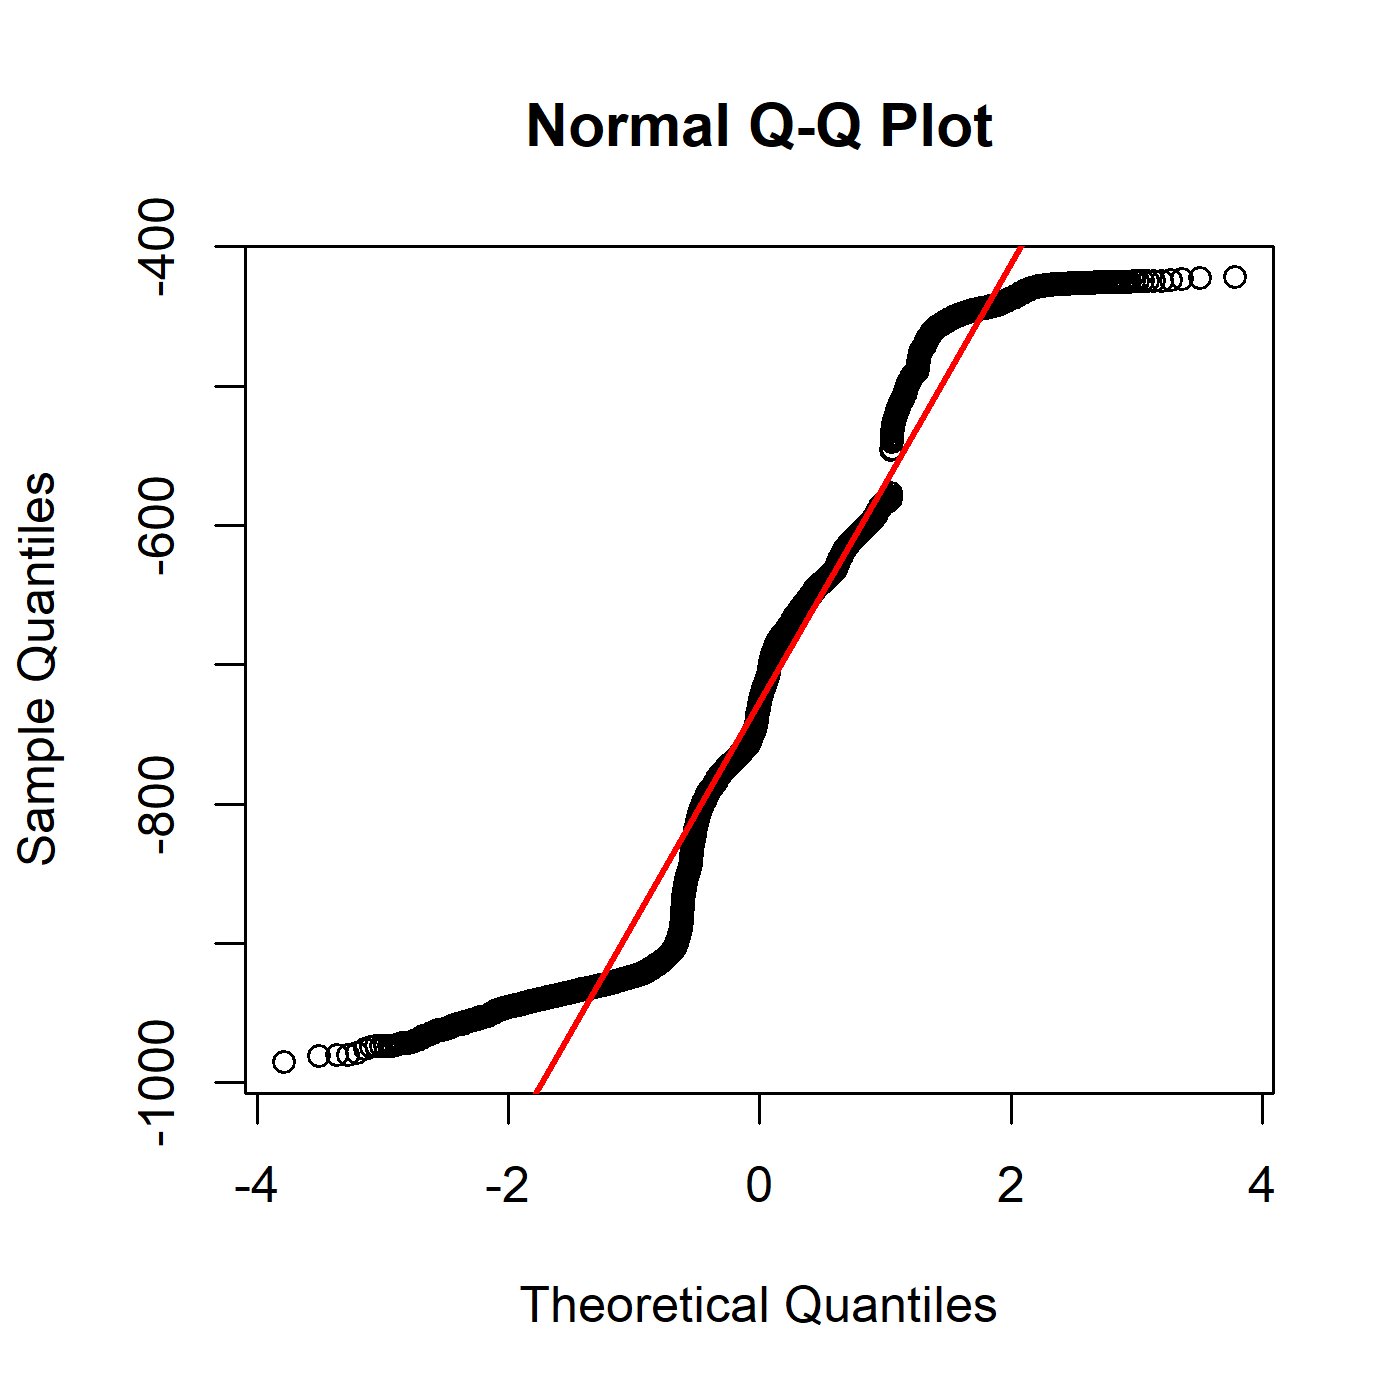

In [167]:
img <- 'energy_qqplot.png' 
png(img, width = 1400, height = 1400, res=300)
qqnorm(nano$energy)
lines((-3):3,((-3):3)*sd(nano$energy)+mean(nano$energy),type="l",col="red",lwd=2)
dev.off()
display_png(file=img) 

In [215]:
# Get PCs
pca.nano <- PCA(scale(nano[-5570,-c(2,8)]))
names(pca.nano)
summary(pca.nano)

[1] "scores"        "loadings"      "var"           "totalvar"     
[5] "centered.data"


PCA model of a mean-centered matrix of 6513 by 6
Number of PCs to cover 90 percent of the variance: 3

           Var Cumul. var.
PC 1 51.598538    51.59854
PC 2 32.984179    84.58272
PC 3  8.337569    92.92029
PC 4  5.015306    97.93559
PC 5  1.421652    99.35724


png 
  2

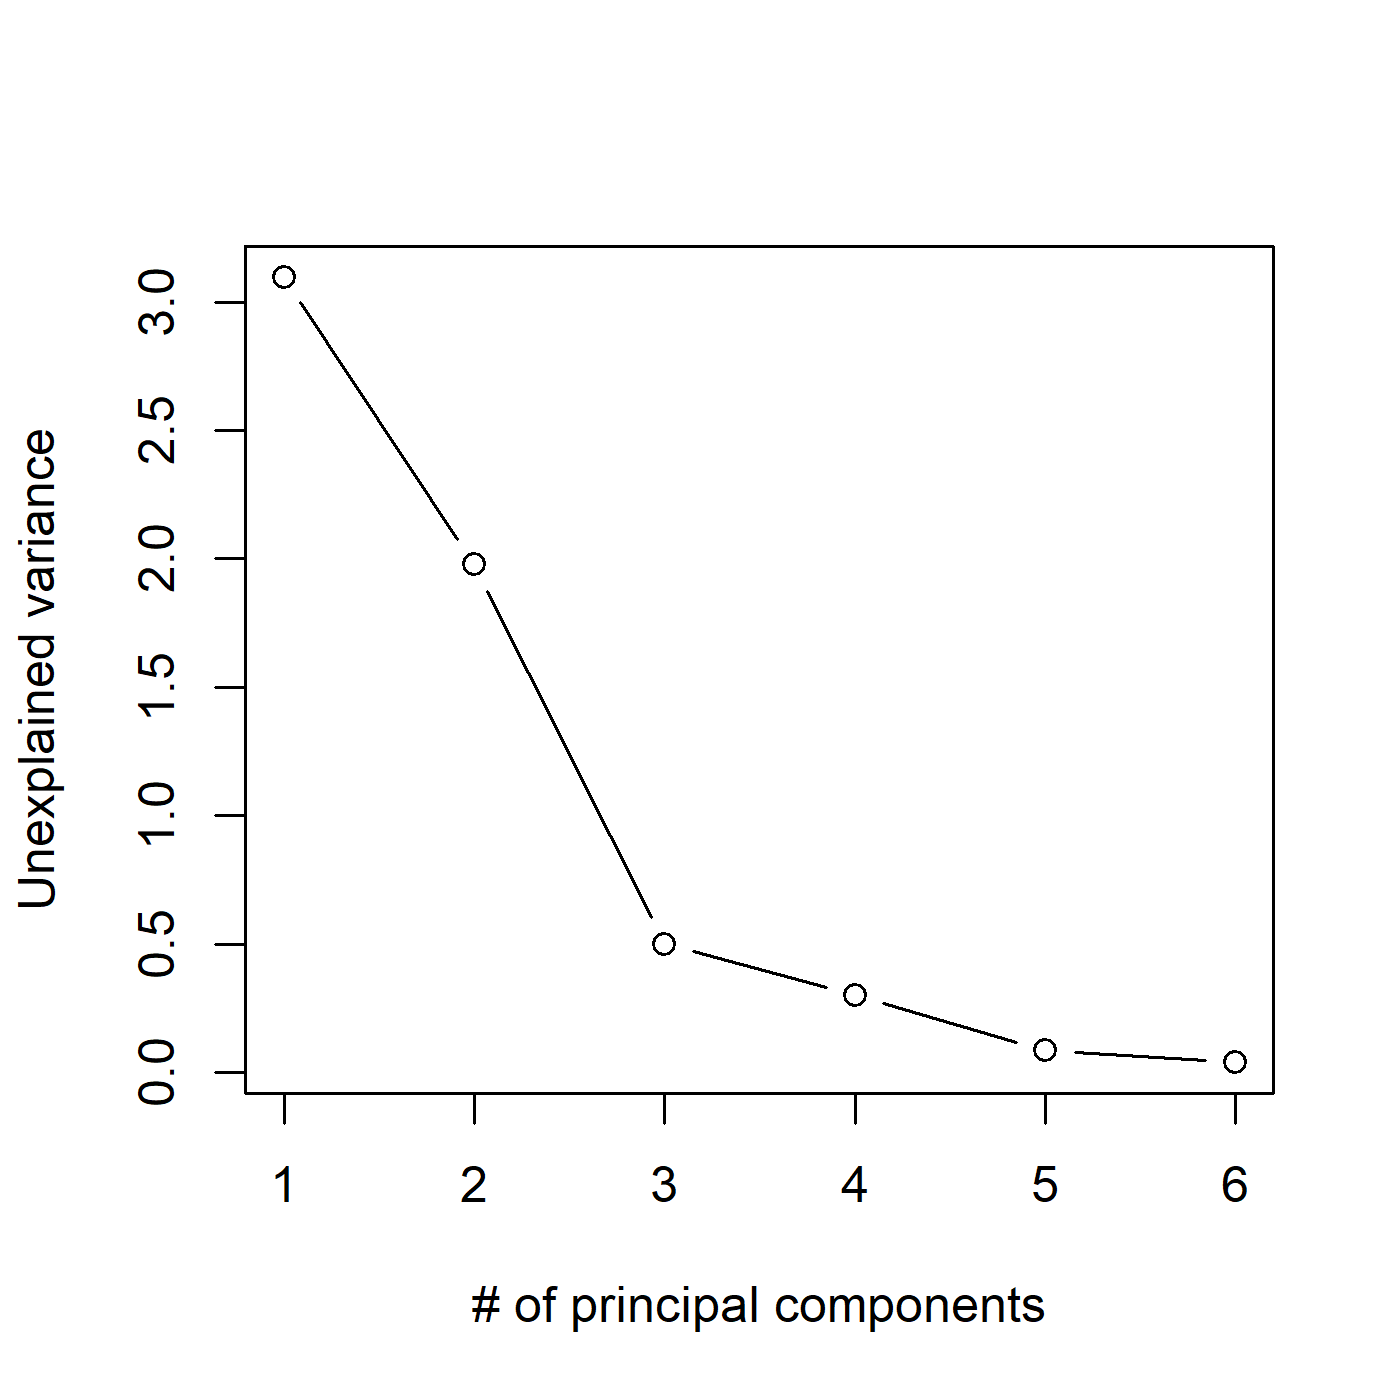

In [216]:
# Plot variance vs. number of PCs
img <- 'variance_vs_pc.png' 
png(img, width = 1400, height = 1400, res=300)
plot(1:length(pca.nano$var), pca.nano$var, type='b', xlab='# of principal components', ylab='Unexplained variance')
dev.off()
display_png(file=img) 

png 
  2

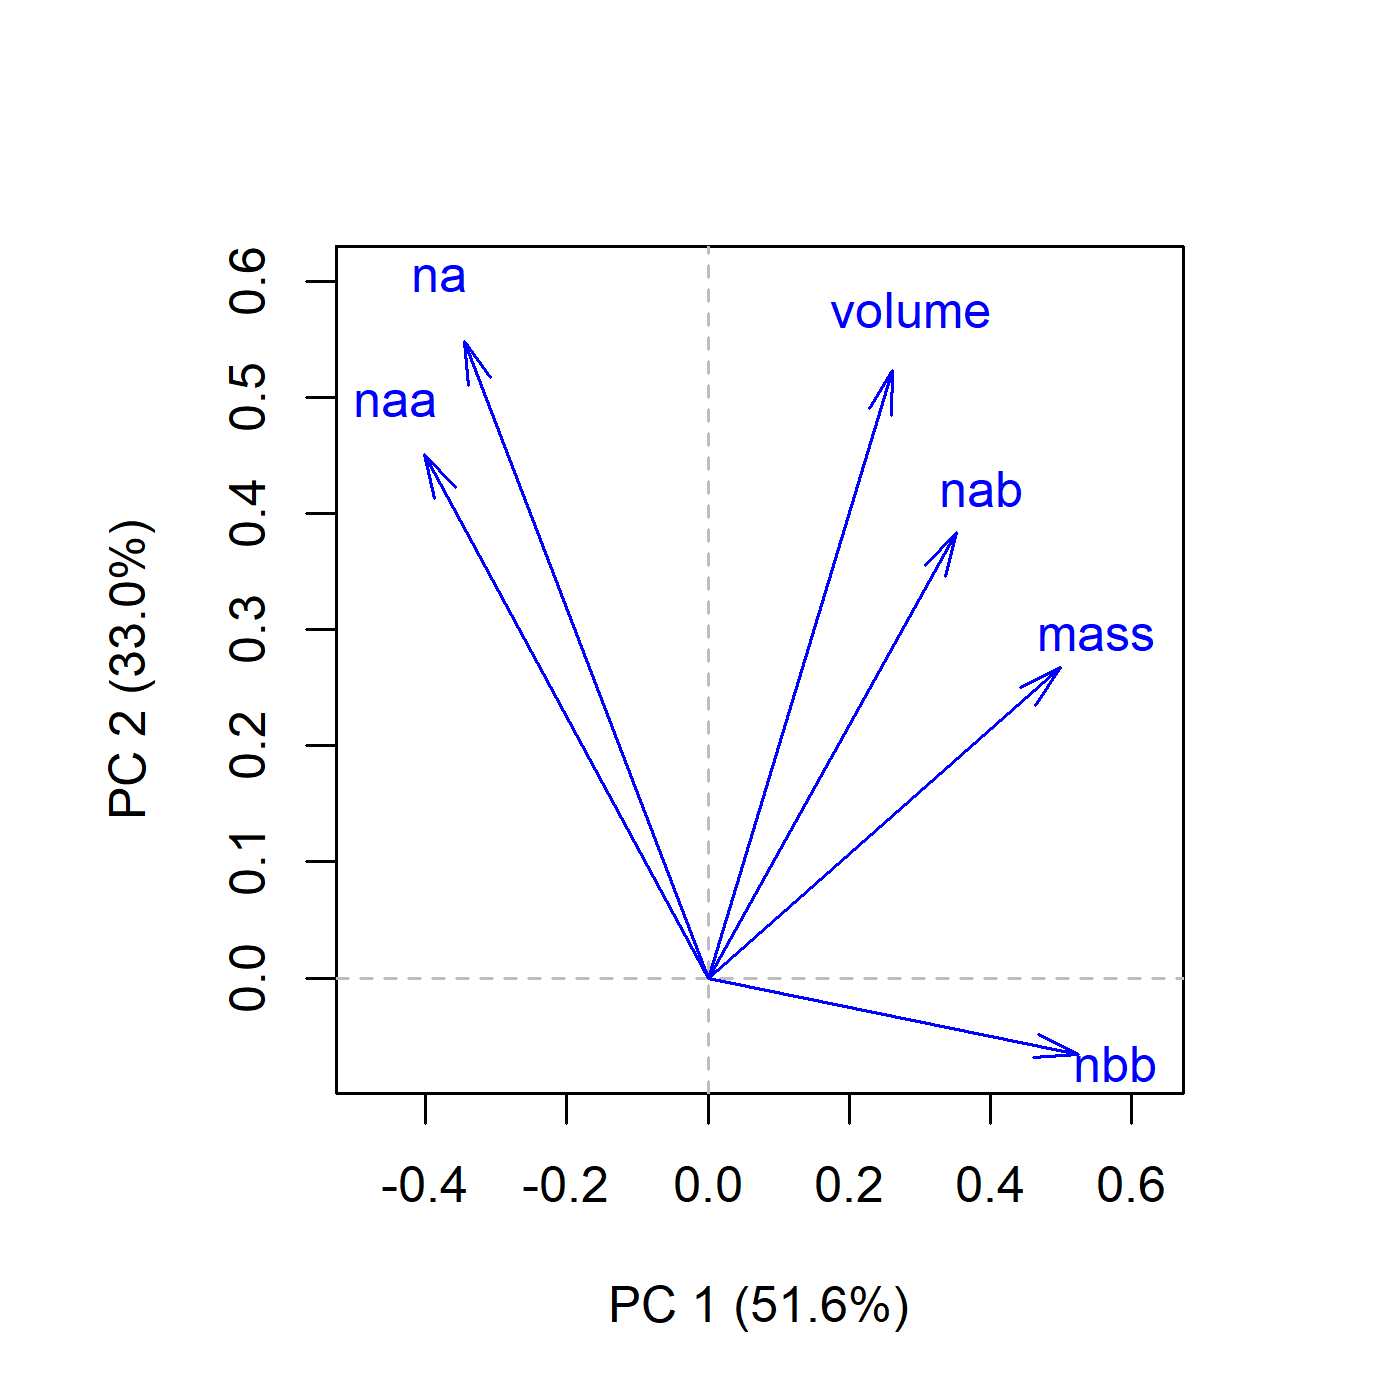

In [217]:
# Plot loadings
img <- 'loadings.png' 
png(img, width = 1400, height = 1400, res=300)
loadingplot(pca.nano, show.names=TRUE)
dev.off()
display_png(file=img) 

In [218]:
loadings(pca.nano)

PC 1       PC 2        PC 3        PC 4       PC 5       PC 6       
na     -0.3457909  0.54827924 -0.04413219  0.1610061 -0.3216083 -0.66971336
naa    -0.4023514  0.45049934  0.13778850  0.4601599  0.4227479  0.47509473
nab     0.3520693  0.38328530 -0.79216035 -0.1167215  0.2963206  0.01384577
nbb     0.5251754 -0.06618475  0.29157705  0.4818090  0.4517172 -0.44565097
mass    0.5001244  0.26702805  0.06337417  0.3780091 -0.6378048  0.35336866
volume  0.2620219  0.52330508  0.51236236 -0.6112897  0.1385745  0.04585956

png 
  2

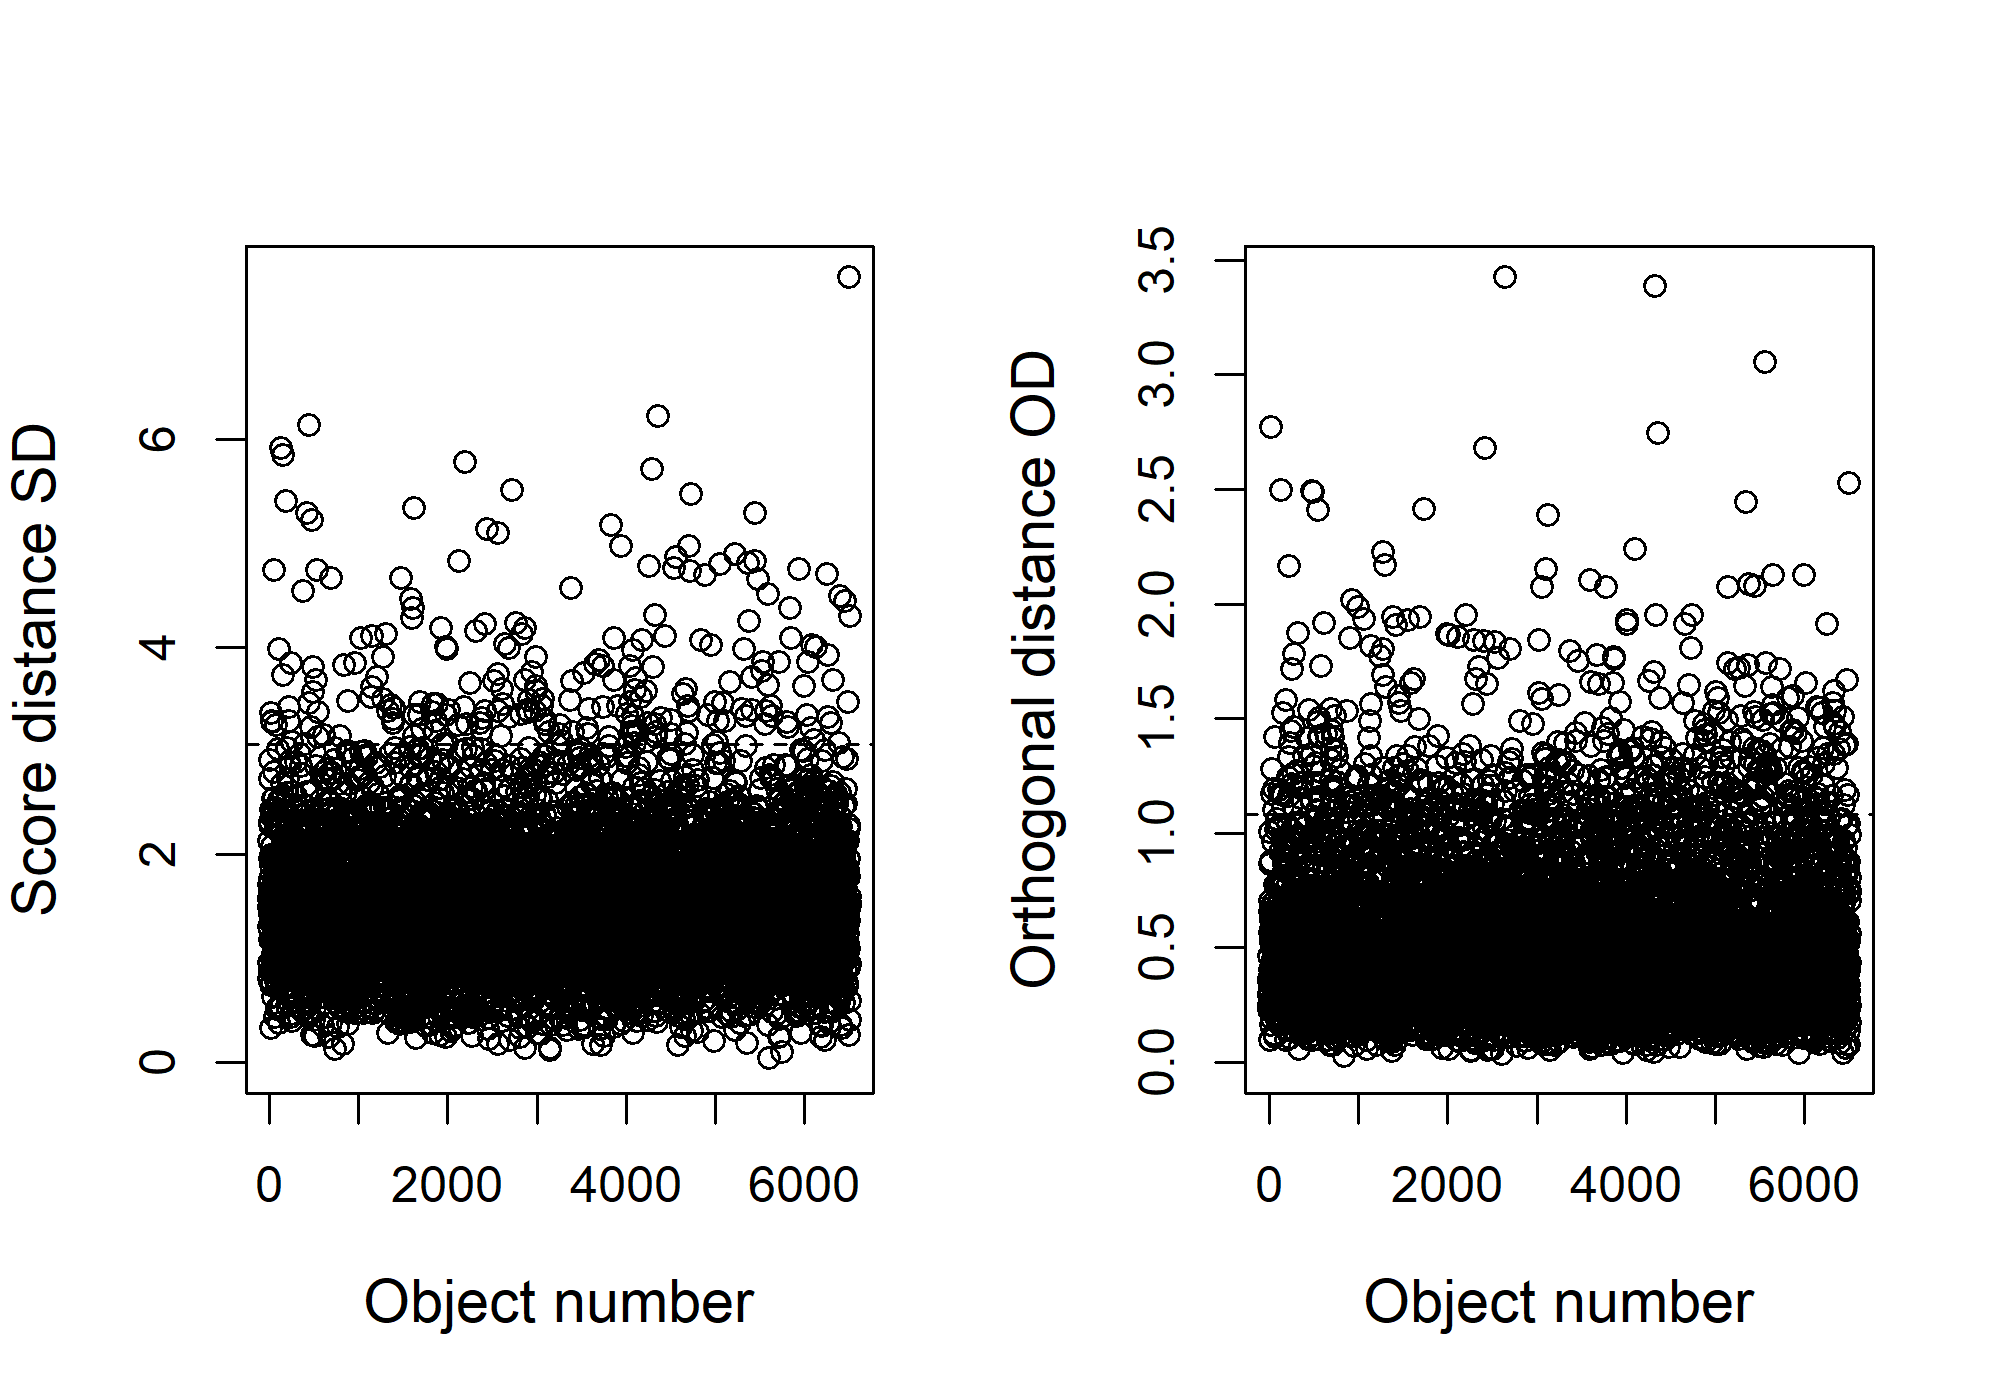

In [219]:
# Diagnostic distance plots
img <- 'diagnostic_distances.png' 
png(img, width = 2000, height = 1400, res=300)
res <- pcaDiagplot(nano[-5570,-c(2,8)], pca.nano, a=3)
dev.off()
display_png(file=img) 

png 
  2

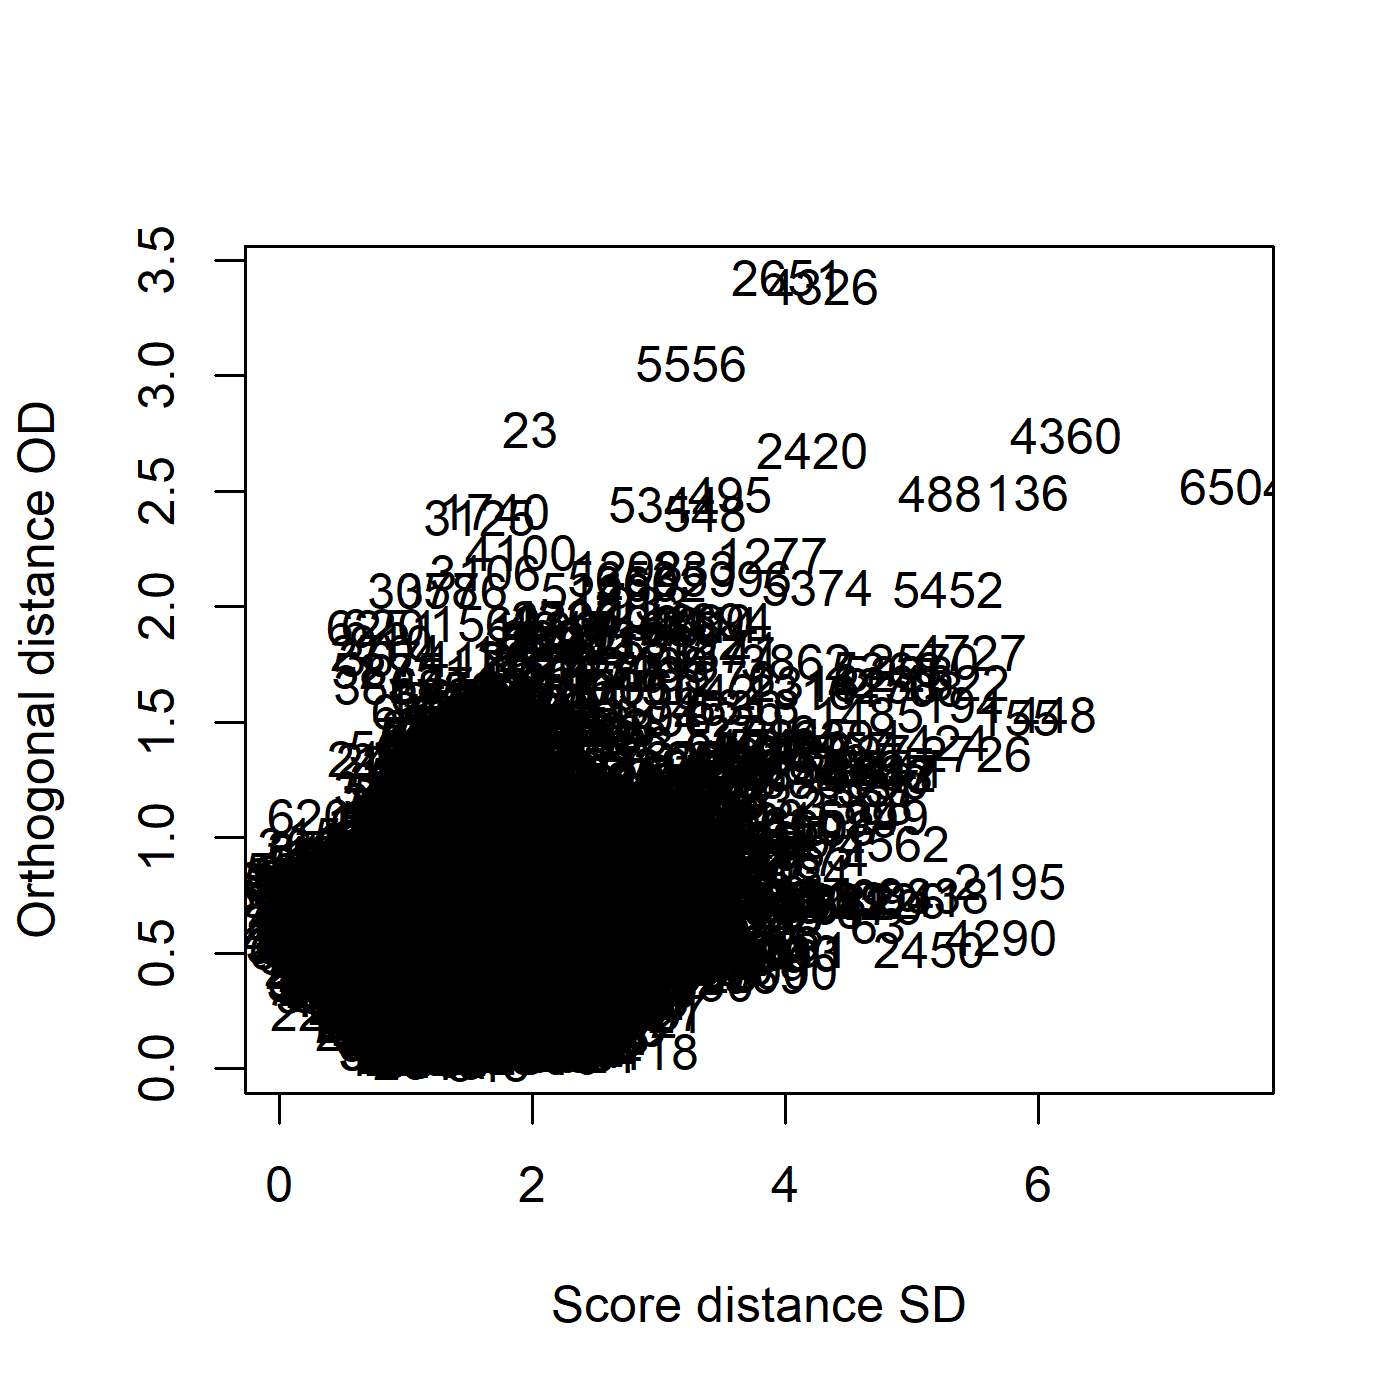

In [220]:
# Diagnostic plots
img <- 'diagnostic.png' 
png(img, width = 1400, height = 1400, res=300)
par(mfrow=c(1,1))
plot(res$SDist, res$ODist, type='n', xlab='Score distance SD', ylab='Orthogonal distance OD')
text(res$SDist, res$ODist, labels=as.character(1:6514))
dev.off()
display_png(file=img) 

png 
  2

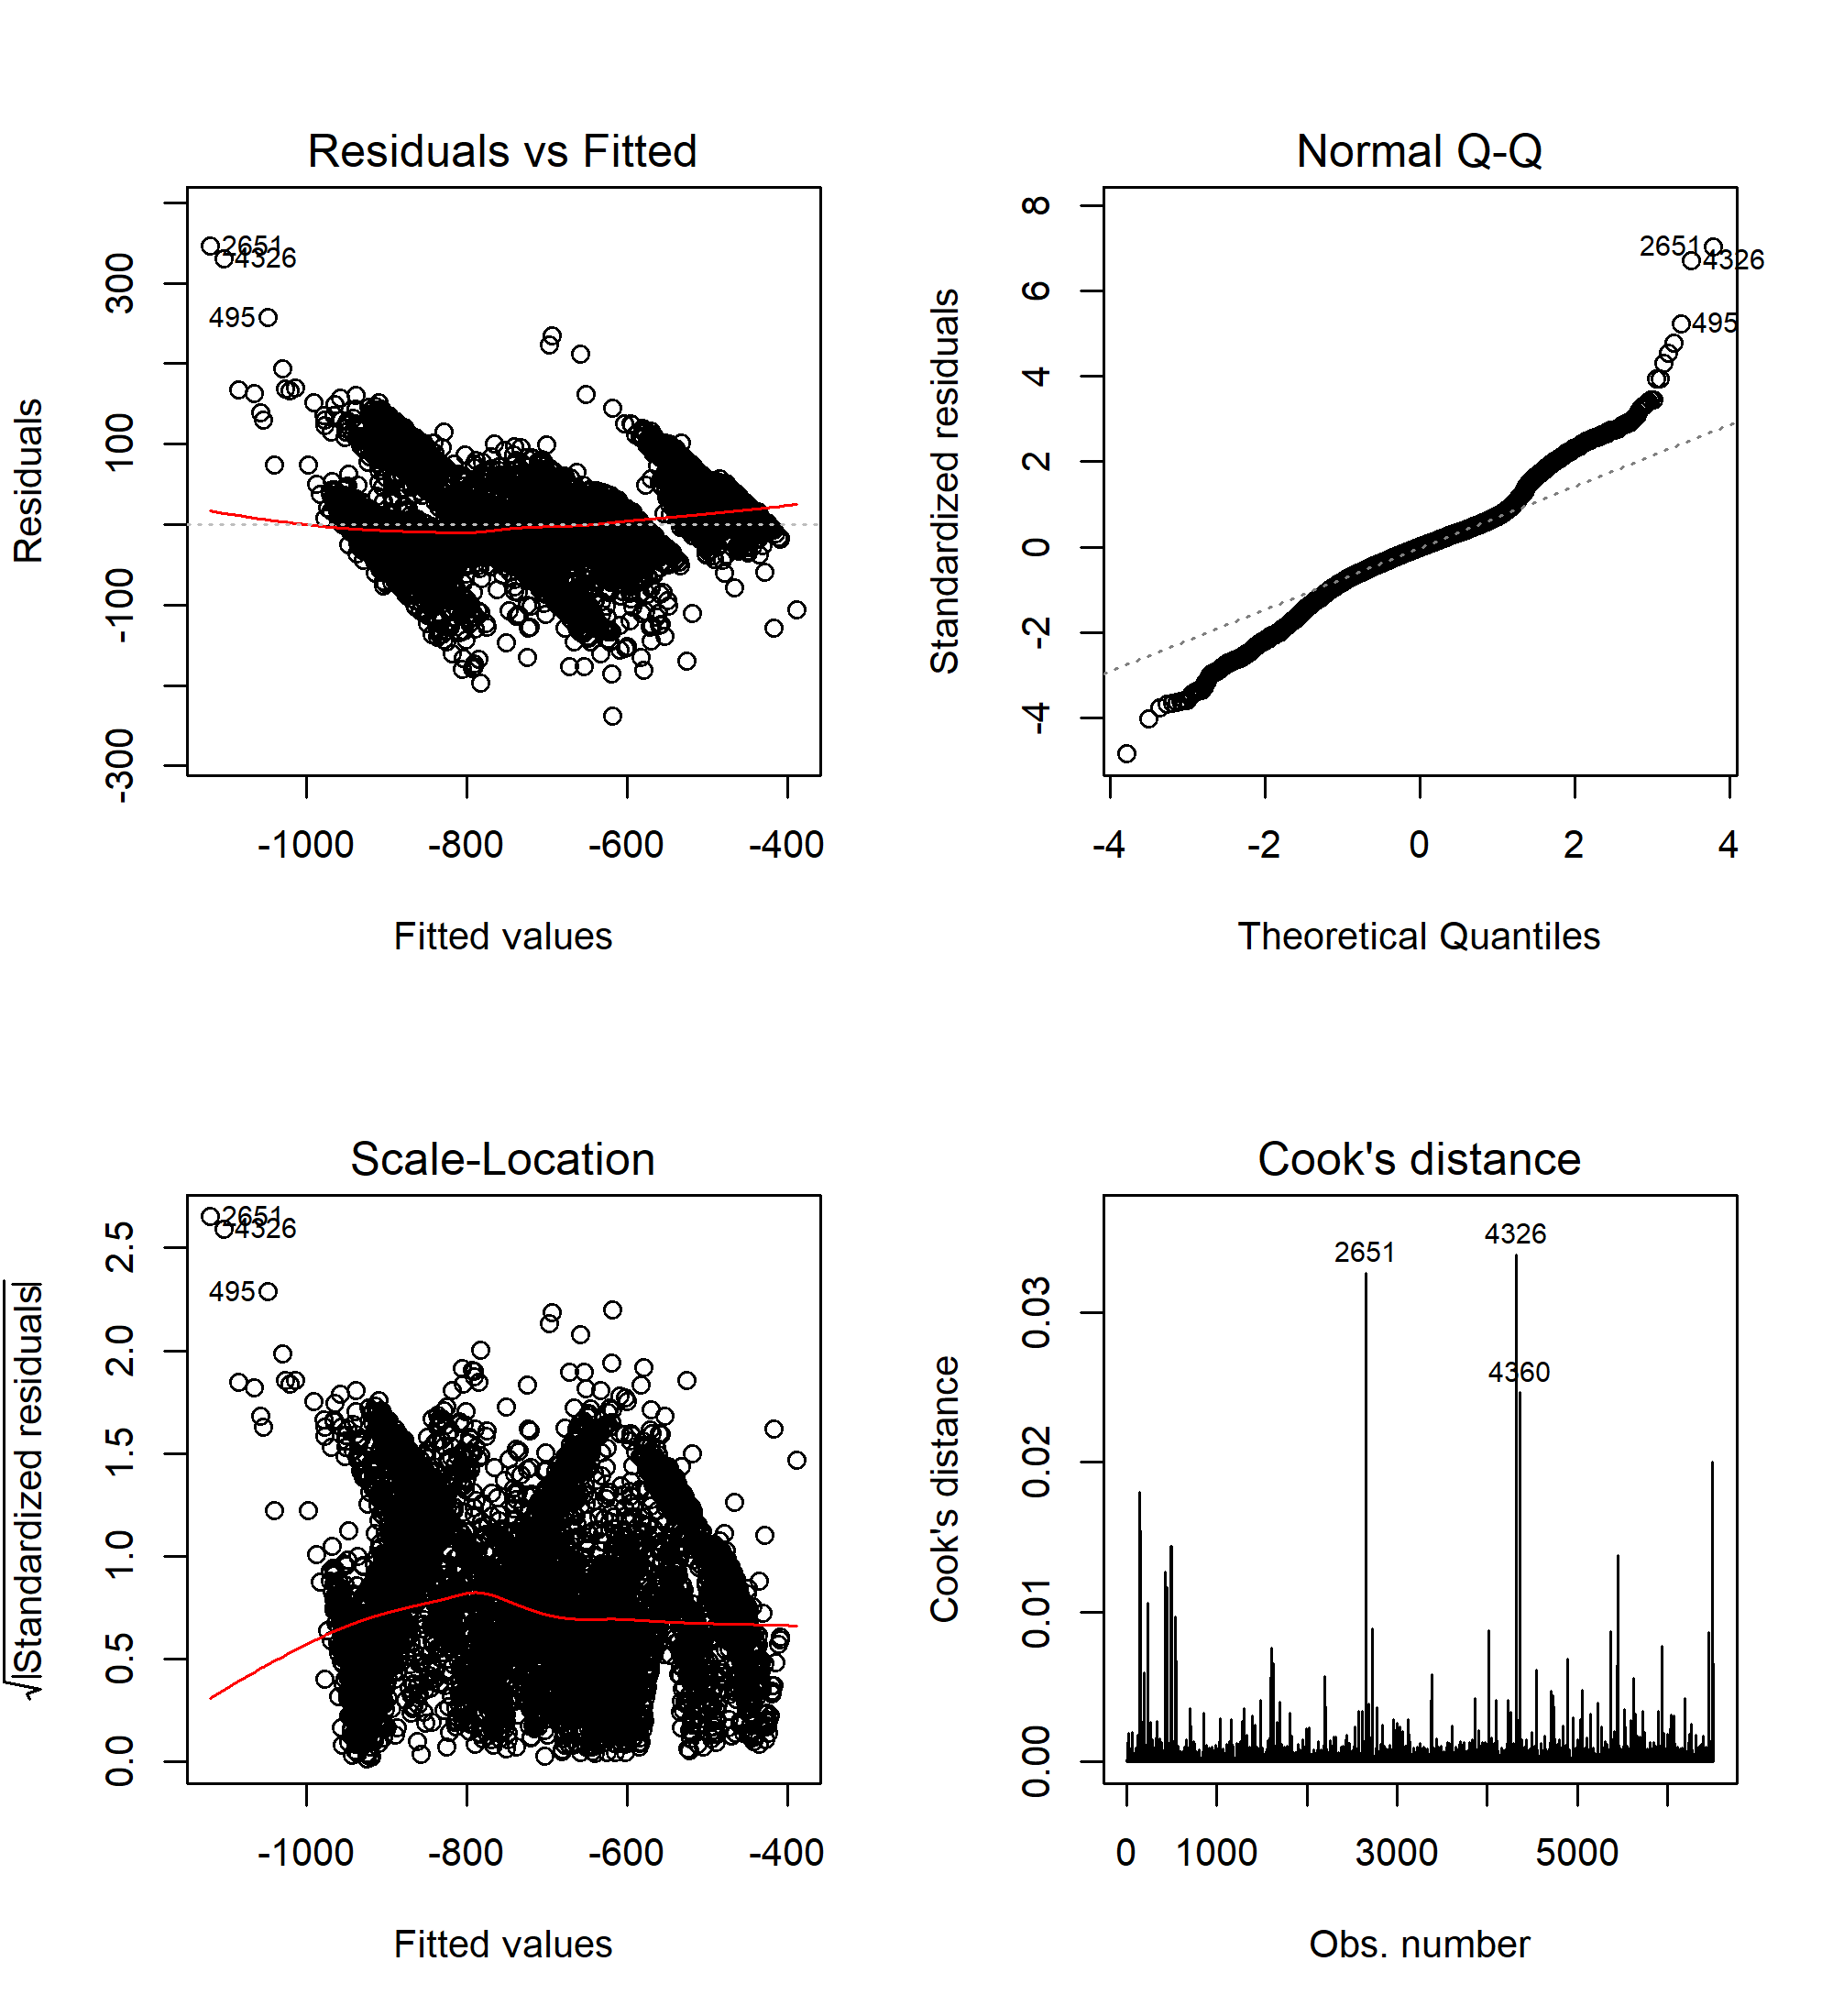

In [223]:
# PCR
# Leaving out the outlier 5570
img <- 'pcr_model_checks.png'
png(img, width = 2000, height = 2200, res=300)
scores <- pca.nano$scores
pcr <- lm(nano$energy[-5570] ~ ., as.data.frame(scores[,1:3]))
par(mfrow=c(2,2))
plot(pcr, which=1:4)
par(mfrow=c(1,1))
dev.off()
display_png(file=img)

In [224]:
# F test
drop1(pcr, test='F')

Df Sum of Sq    RSS       AIC      F value      Pr(>F)     
<none> NA           NA  15789135 50765.61           NA          NA
`PC 1`  1  37204130.81  52993266 58649.83 15337.235464 0.000000000
`PC 2`  1 108415762.81 124204898 64197.40 44693.910225 0.000000000
`PC 3`  1     24113.94  15813249 50773.55     9.940865 0.001623842

In [225]:
summary(pcr)$coef

Estimate    Std. Error t value      Pr(>|t|)   
(Intercept) -727.040356 0.6102833  -1191.316120 0.000000000
`PC 1`       -42.958001 0.3468730   -123.843593 0.000000000
`PC 2`       -91.719263 0.4338468   -211.409343 0.000000000
`PC 3`        -2.720706 0.8629179     -3.152914 0.001623842

           Test stat Pr(>|Test stat|)    
Tukey test    20.136        < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


png 
  2

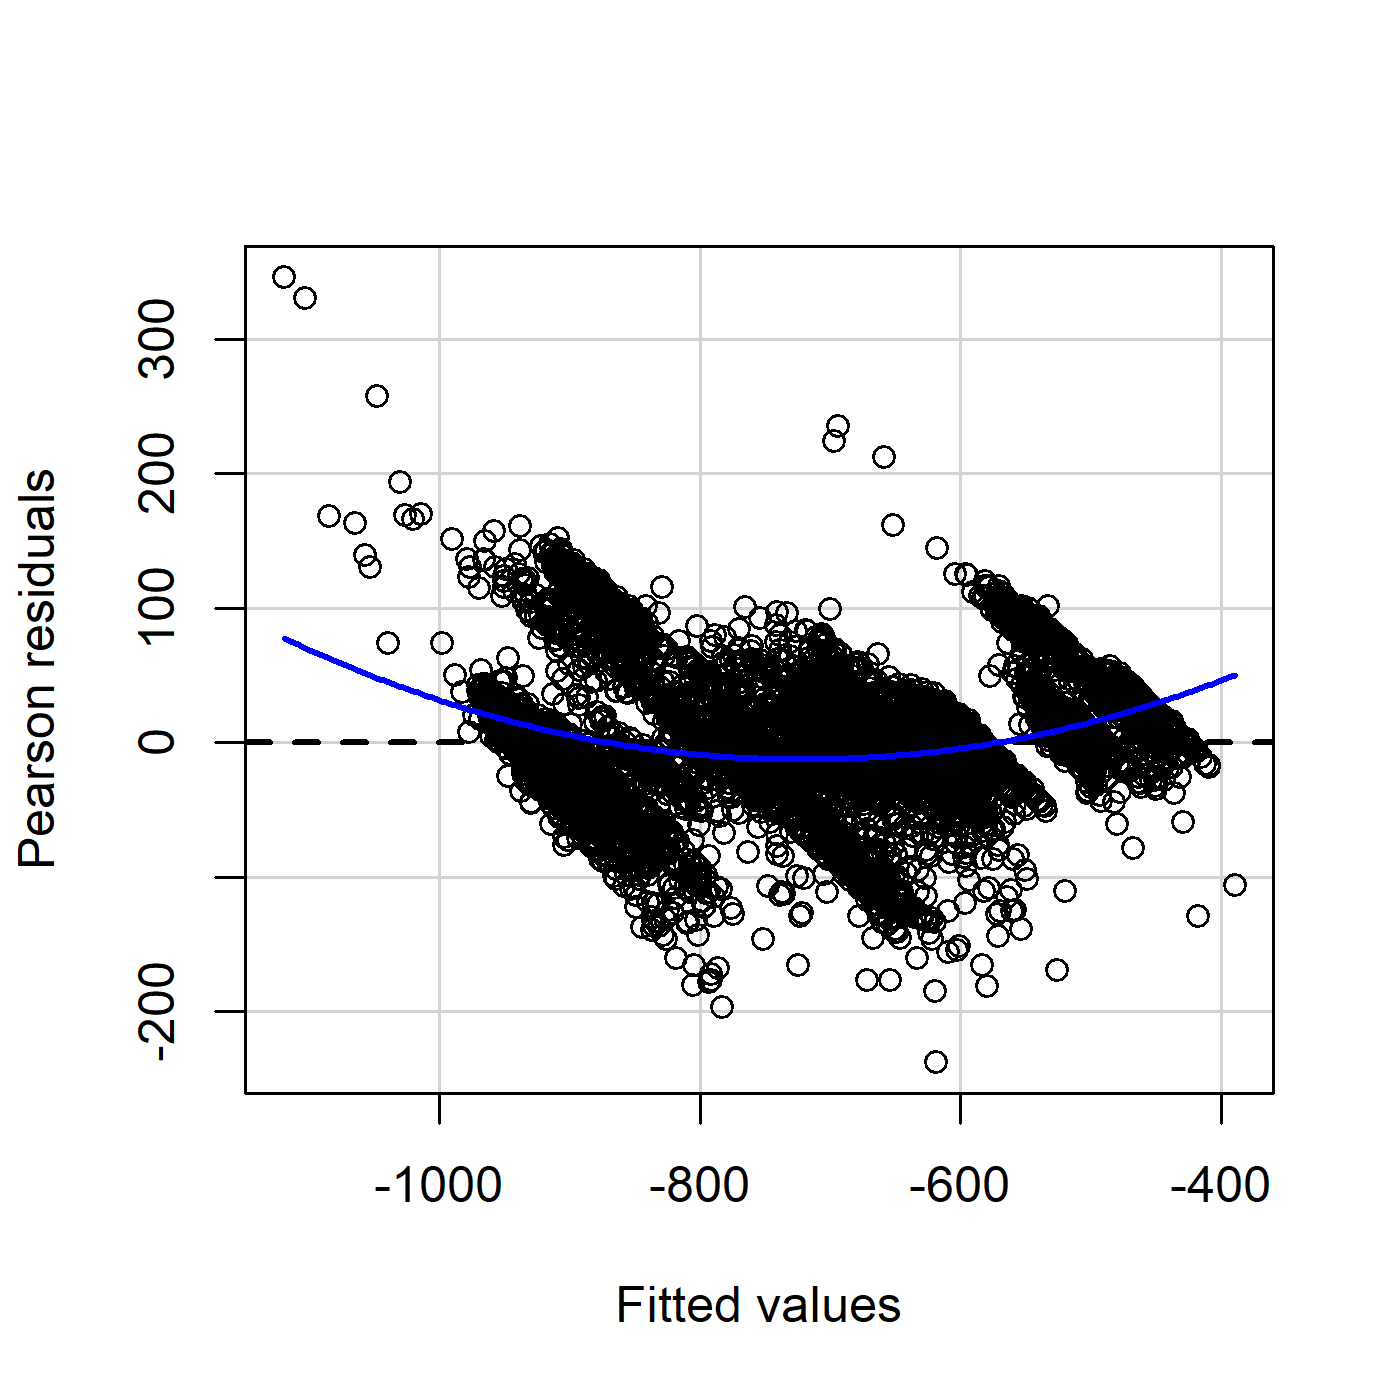

In [226]:
img <- 'pcr_linearity_checks.png'
png(img, width = 1400, height = 1400, res=300)
residualPlots(pcr)
dev.off()
display_png(file=img) 

In [227]:
summary(pcr)


Call:
lm(formula = nano$energy[-5570] ~ ., data = as.data.frame(scores[, 
    1:3]))

Residuals:
    Min      1Q  Median      3Q     Max 
-237.77  -25.06    0.25   22.80  345.88 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) -727.0404     0.6103 -1191.316  < 2e-16 ***
`PC 1`       -42.9580     0.3469  -123.844  < 2e-16 ***
`PC 2`       -91.7193     0.4338  -211.409  < 2e-16 ***
`PC 3`        -2.7207     0.8629    -3.153  0.00162 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49.25 on 6509 degrees of freedom
Multiple R-squared:  0.9022,	Adjusted R-squared:  0.9021 
F-statistic: 2.001e+04 on 3 and 6509 DF,  p-value: < 2.2e-16


png 
  2

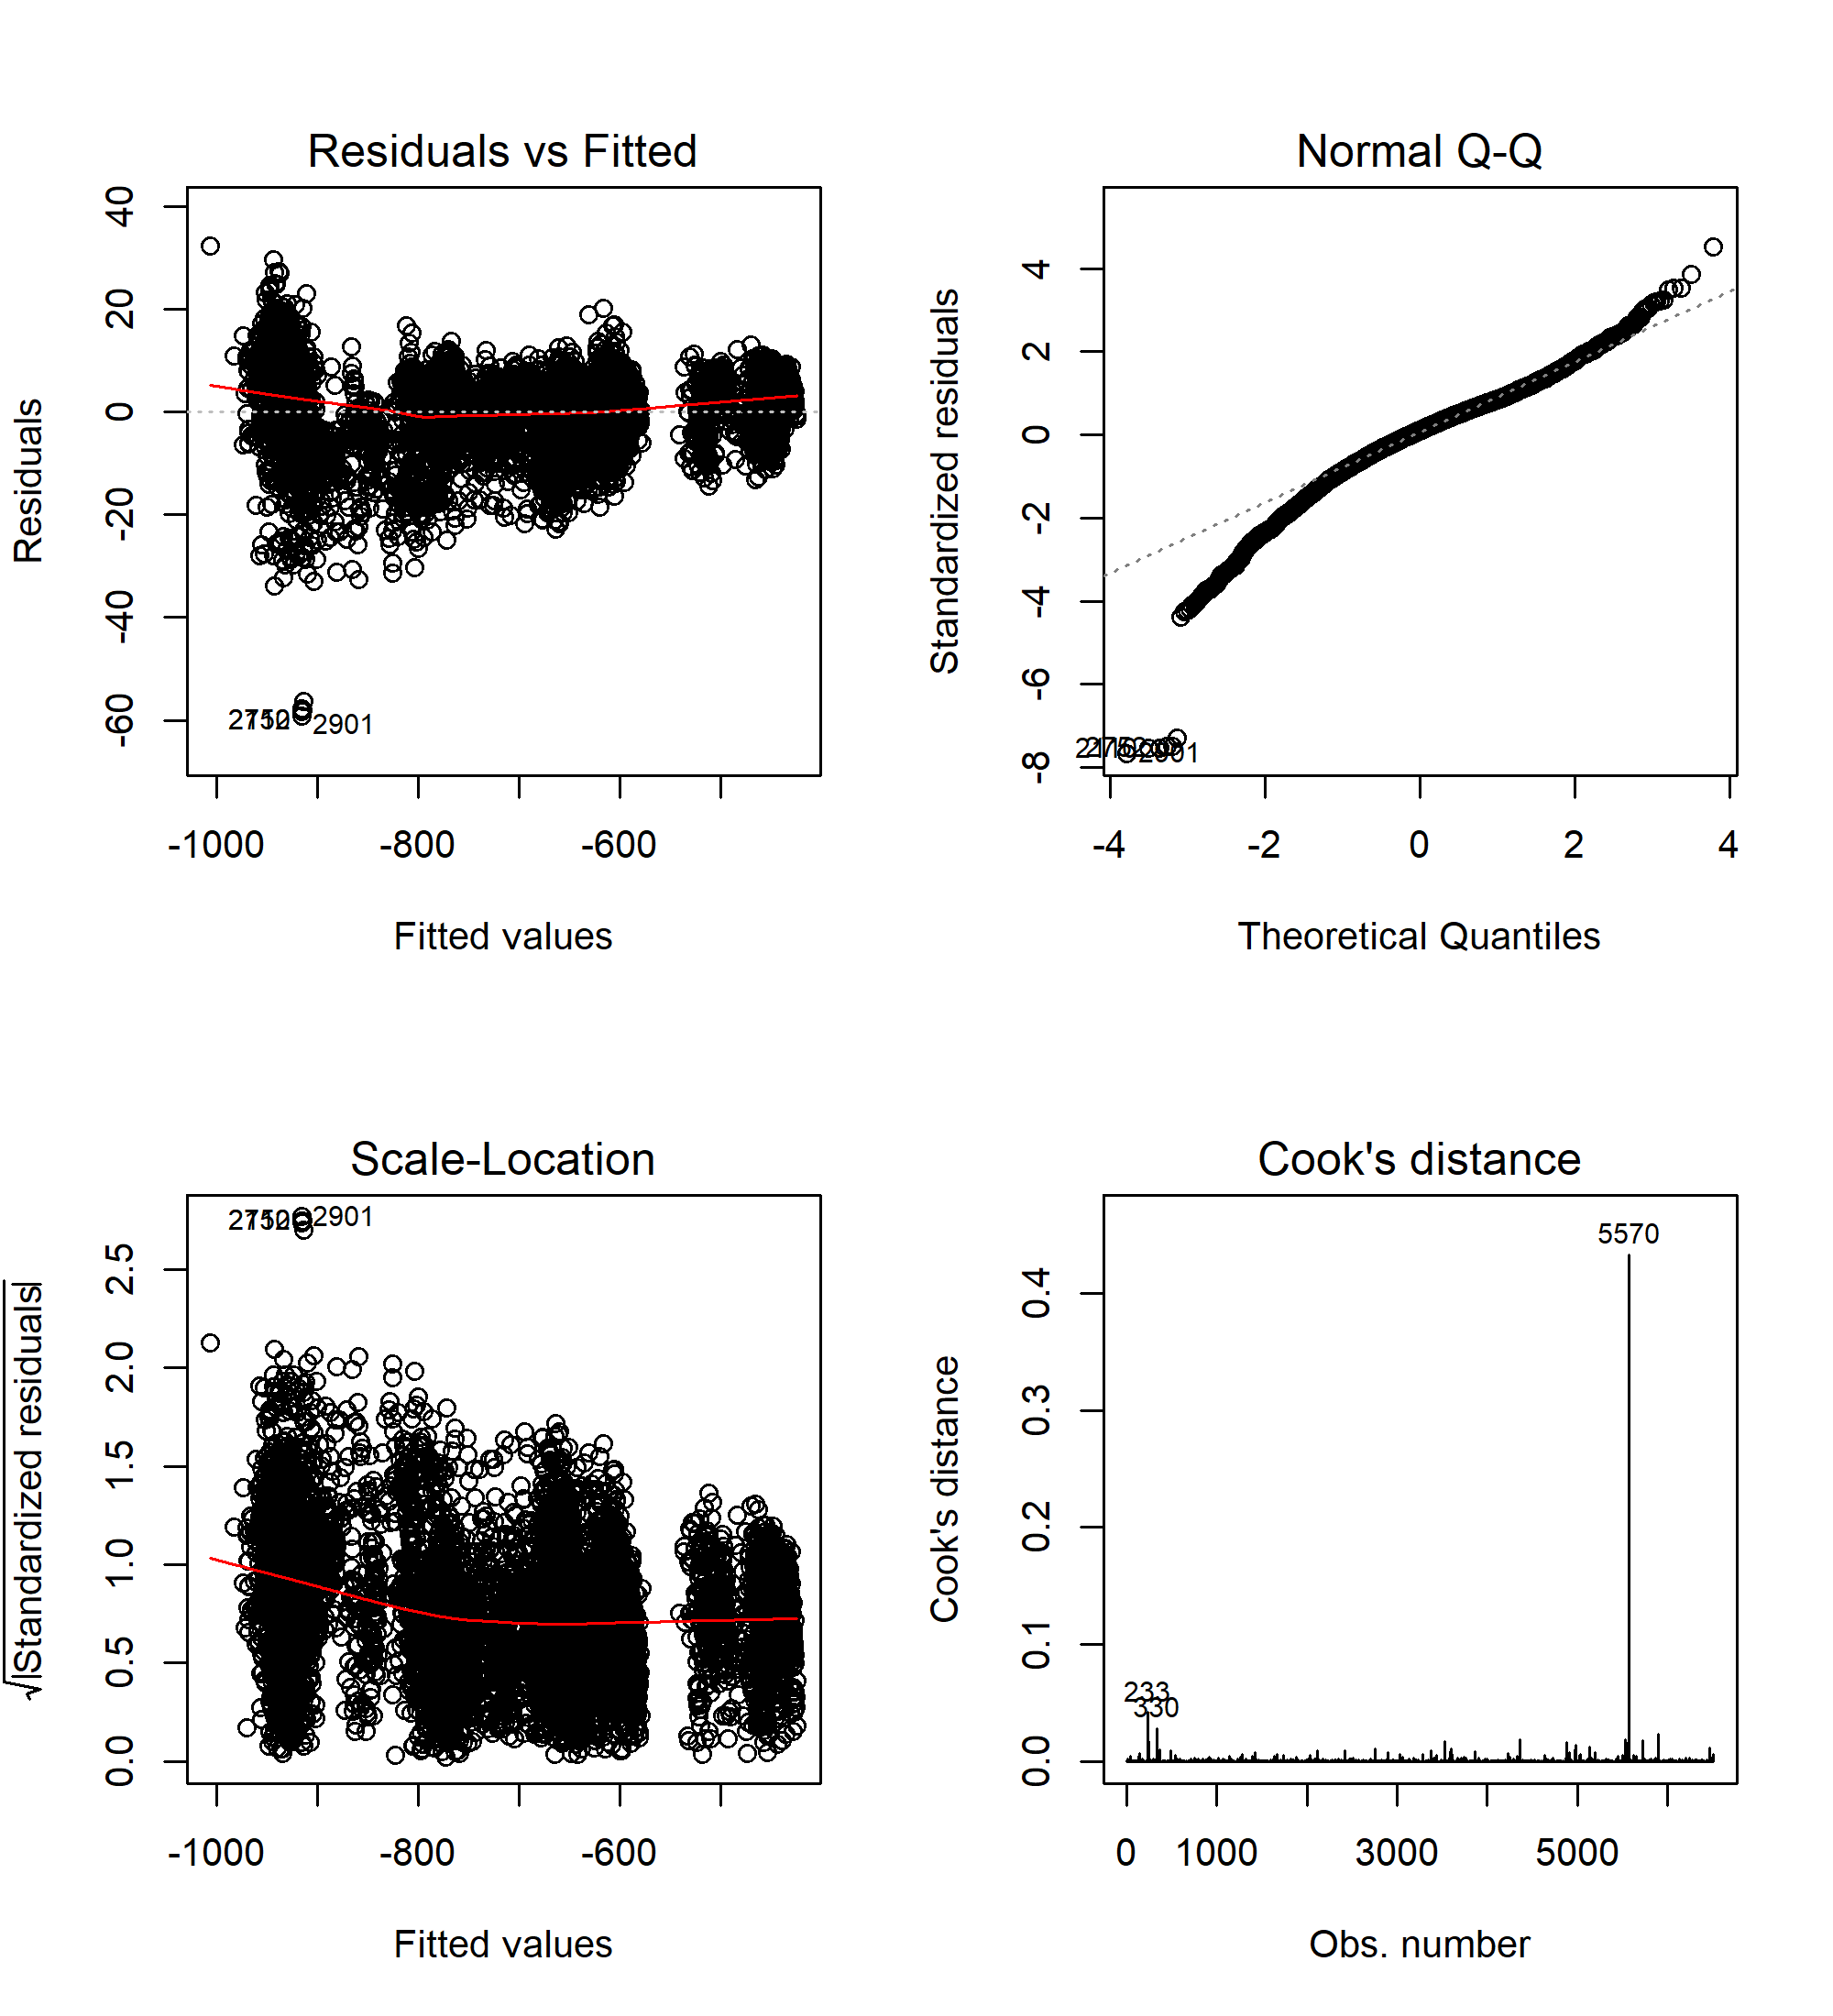

In [178]:
# MLR
img <- 'initial_mlr_model_checks.png'
png(img, width = 2000, height = 2200, res=300)
norm.nano <- data.frame(nano)
norm.nano[c(1:7)] <- scale(norm.nano[c(1:7)])
mlr0 <- lm(energy ~ ., data=norm.nano)
par(mfrow=c(2,2))
plot(mlr0, which=1:4)
par(mfrow=c(1,1))
dev.off()
display_png(file=img)
# Find outlier 5570 in Cook's distance

png 
  2

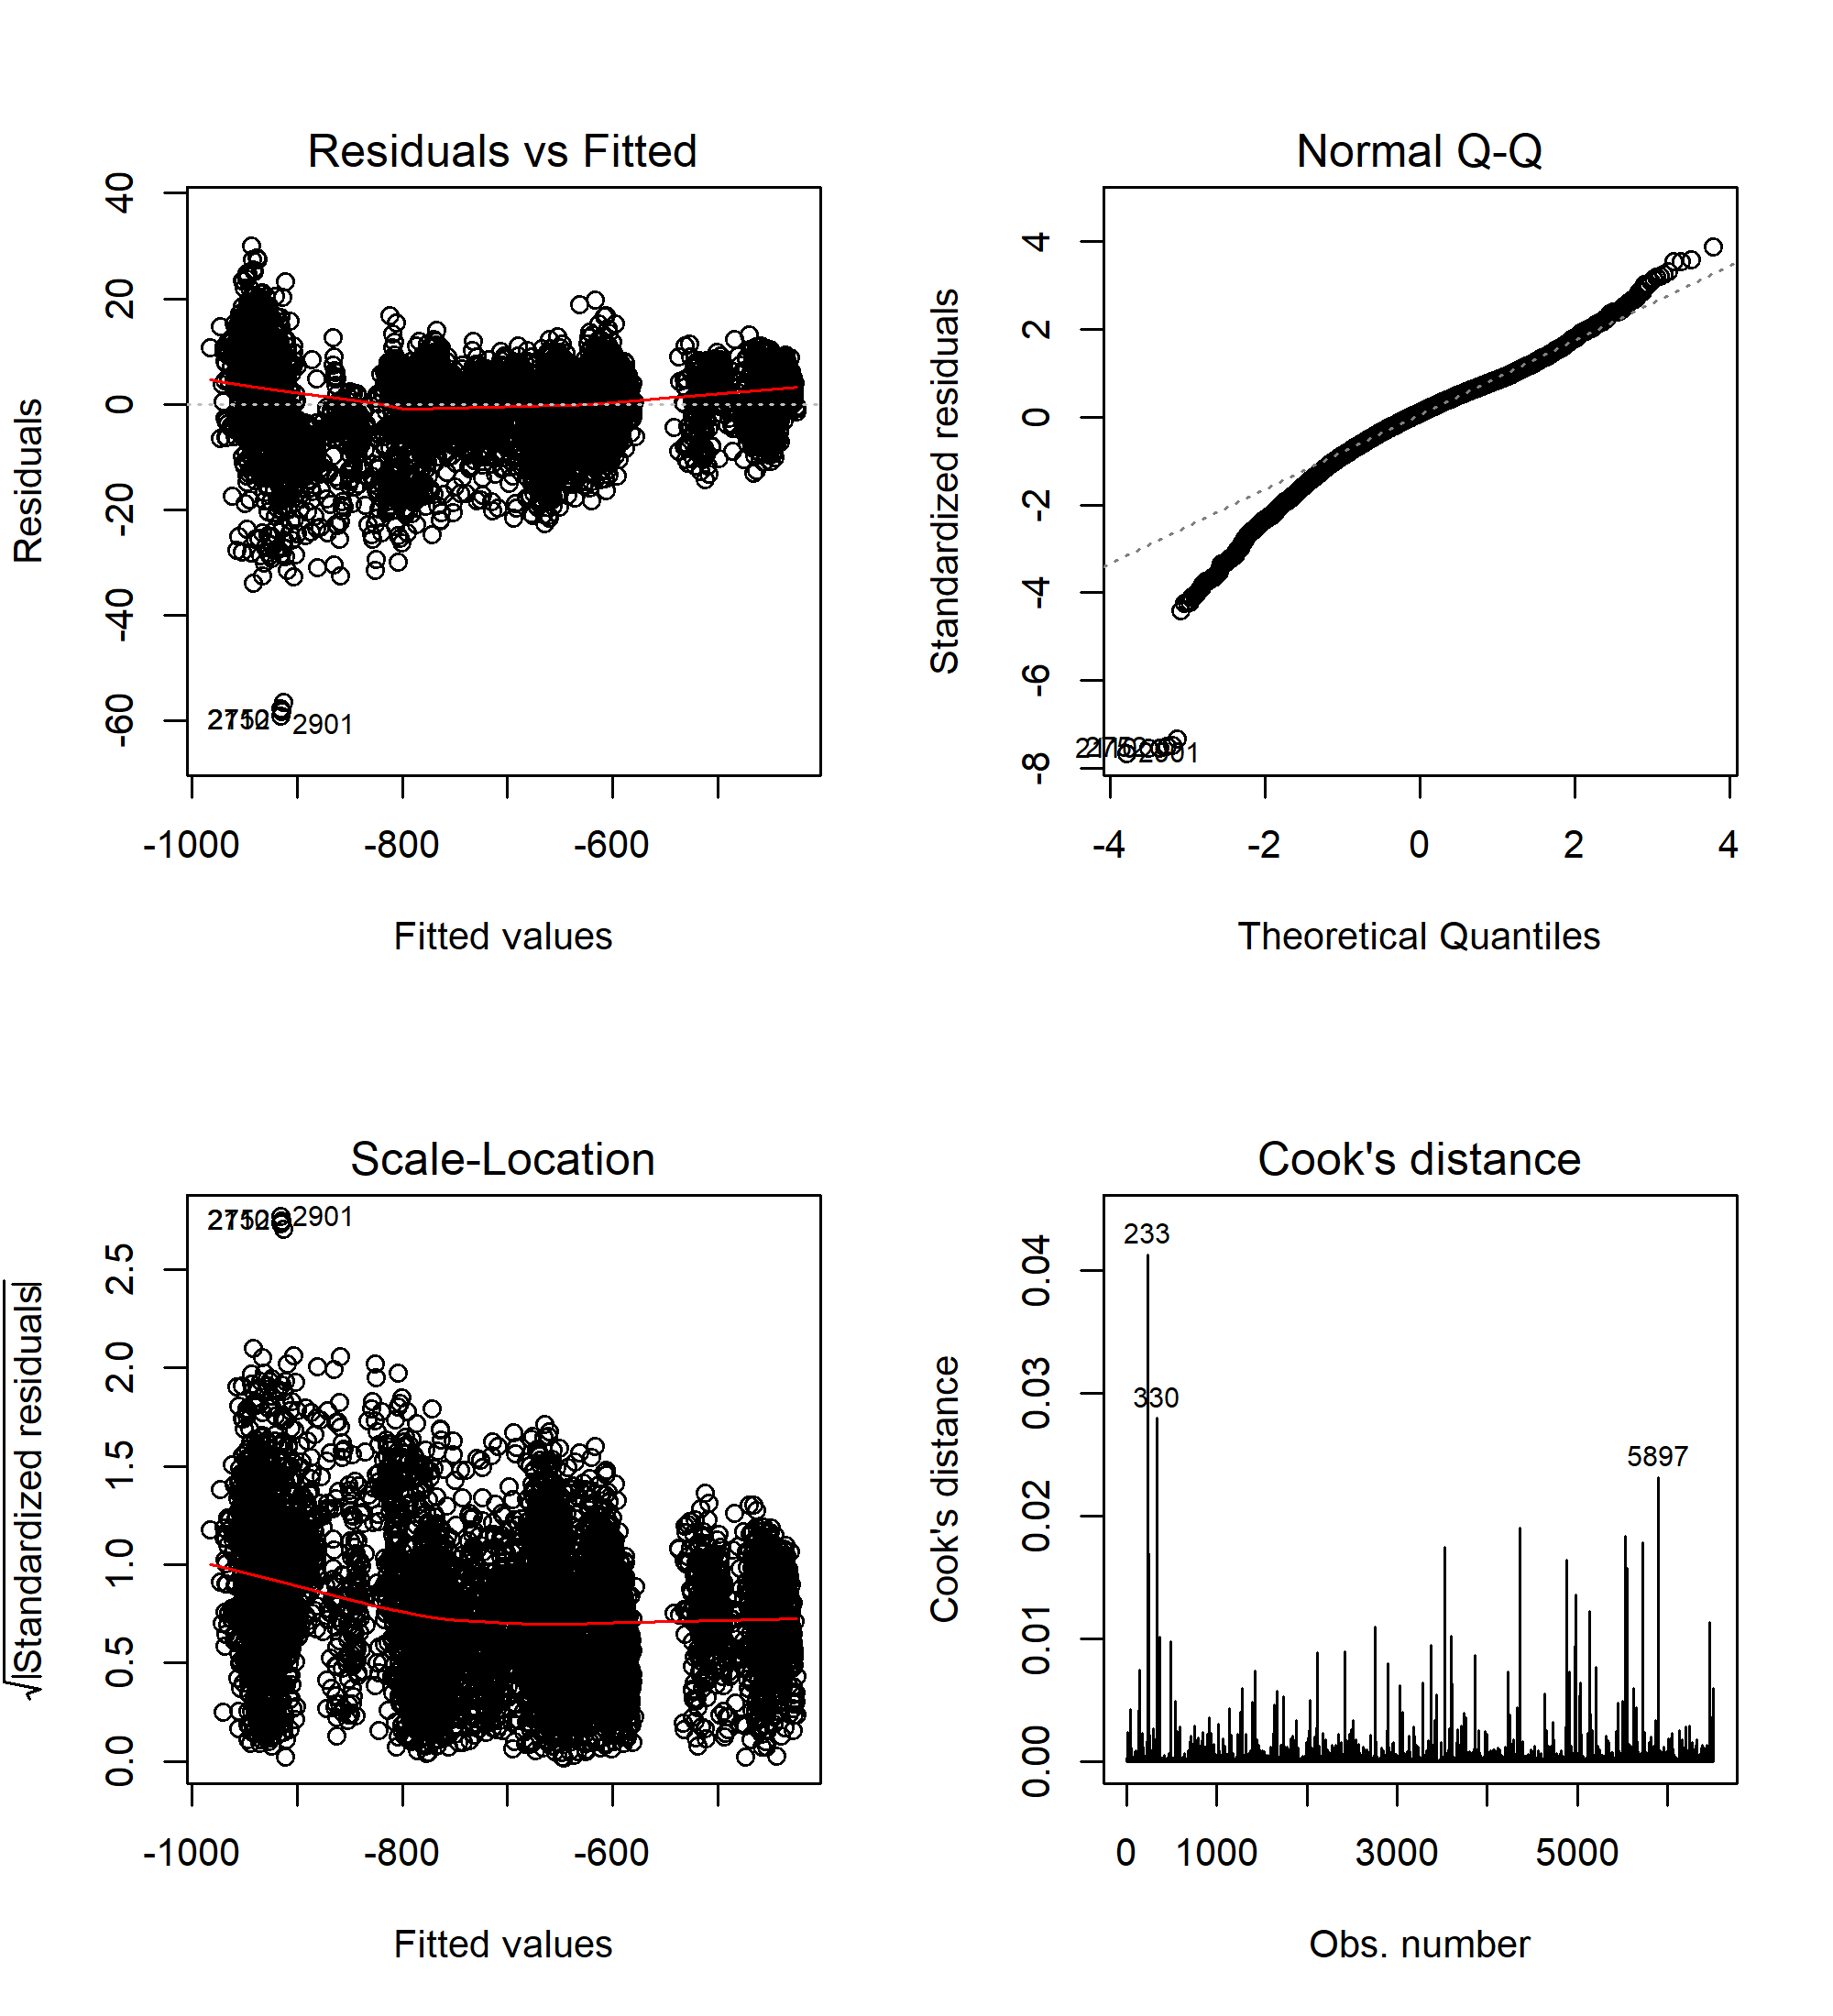

In [179]:
# MLR                                         
# Leaving out the outlier 5570
newnano <- norm.nano[-5570,]
img <- 'mlr_model_checks.png'
png(img, width = 2000, height = 2200, res=300)
mlr0 <- lm(energy ~ ., data=newnano)
par(mfrow=c(2,2))
plot(mlr0, which=1:4)
par(mfrow=c(1,1))
dev.off()
display_png(file=img) 

           Test stat Pr(>|Test stat|)    
na          -10.0649        < 2.2e-16 ***
nb           -0.4328        0.6651525    
naa          -3.1472        0.0016559 ** 
nab           9.8775        < 2.2e-16 ***
nbb         -10.4196        < 2.2e-16 ***
mass          7.3301        2.579e-13 ***
volume       -3.3553        0.0007974 ***
Tukey test   20.4054        < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


png 
  2

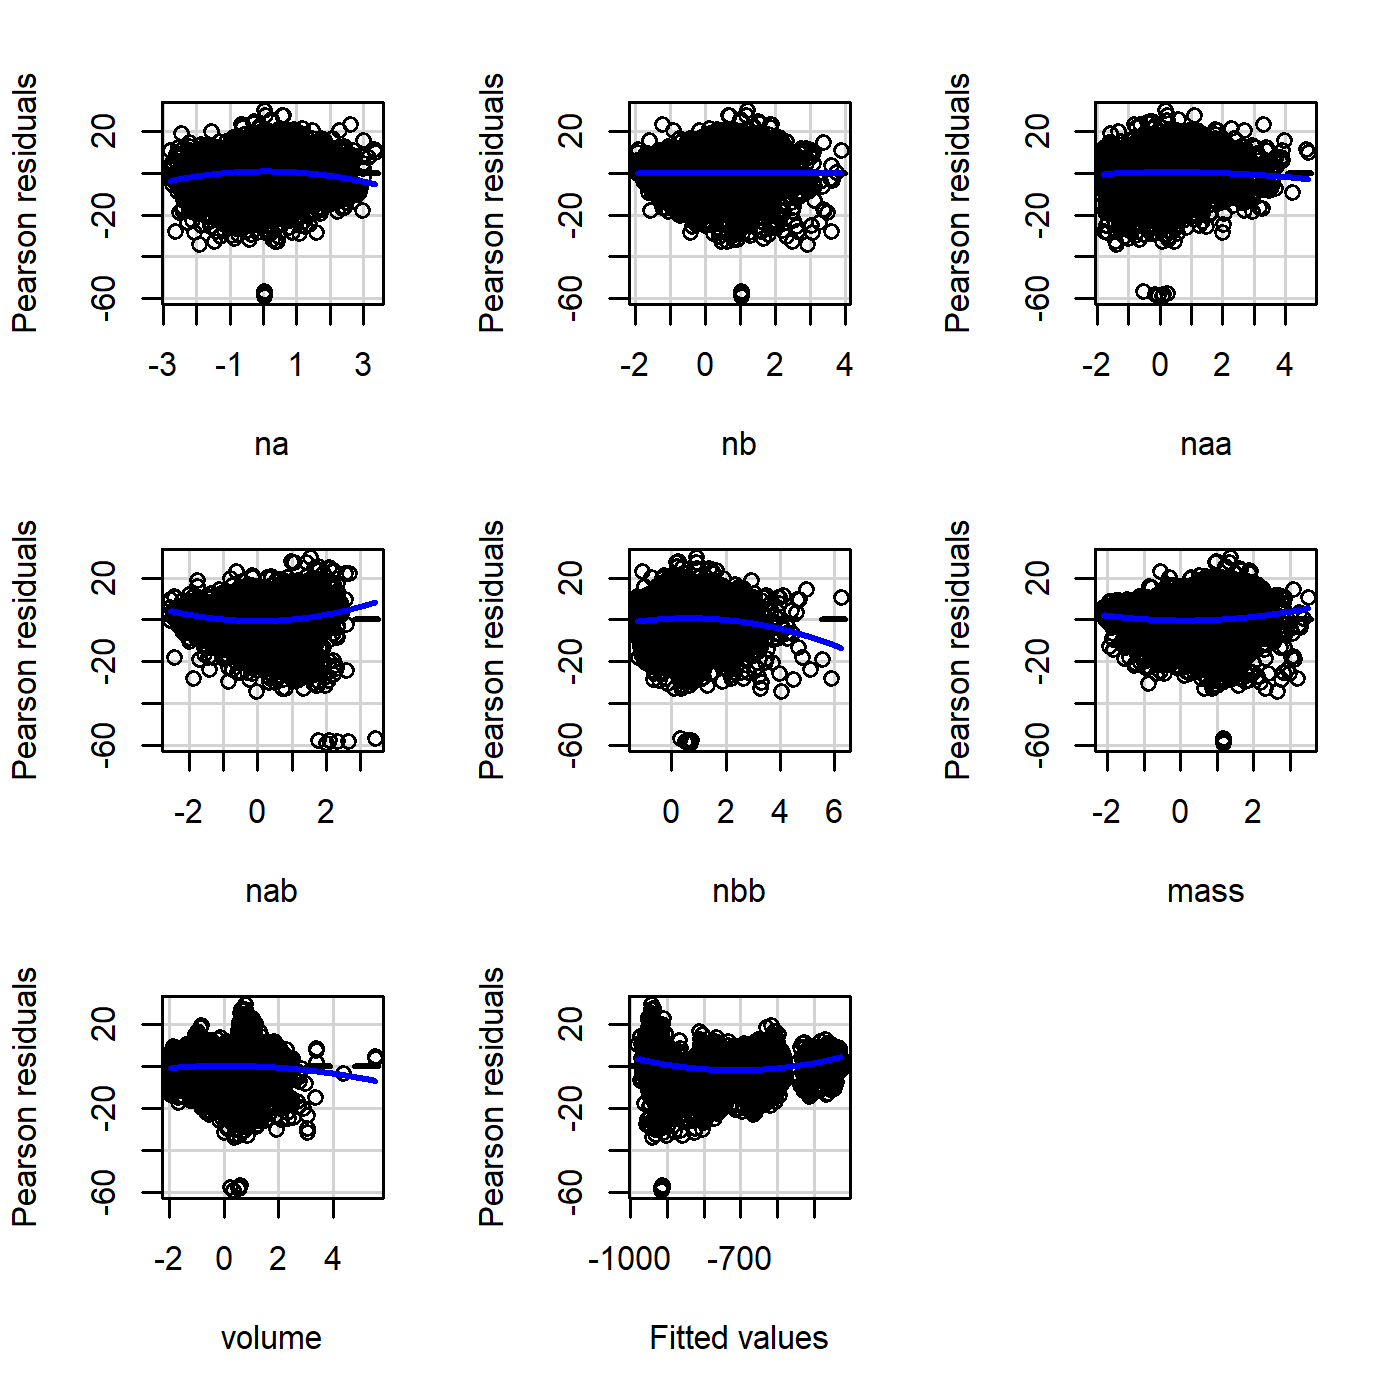

In [180]:
img <- 'mlr_linearity_checks.png'
png(img, width = 1400, height = 1400, res=300)
residualPlots(mlr0)
dev.off()
display_png(file=img) 

png 
  2

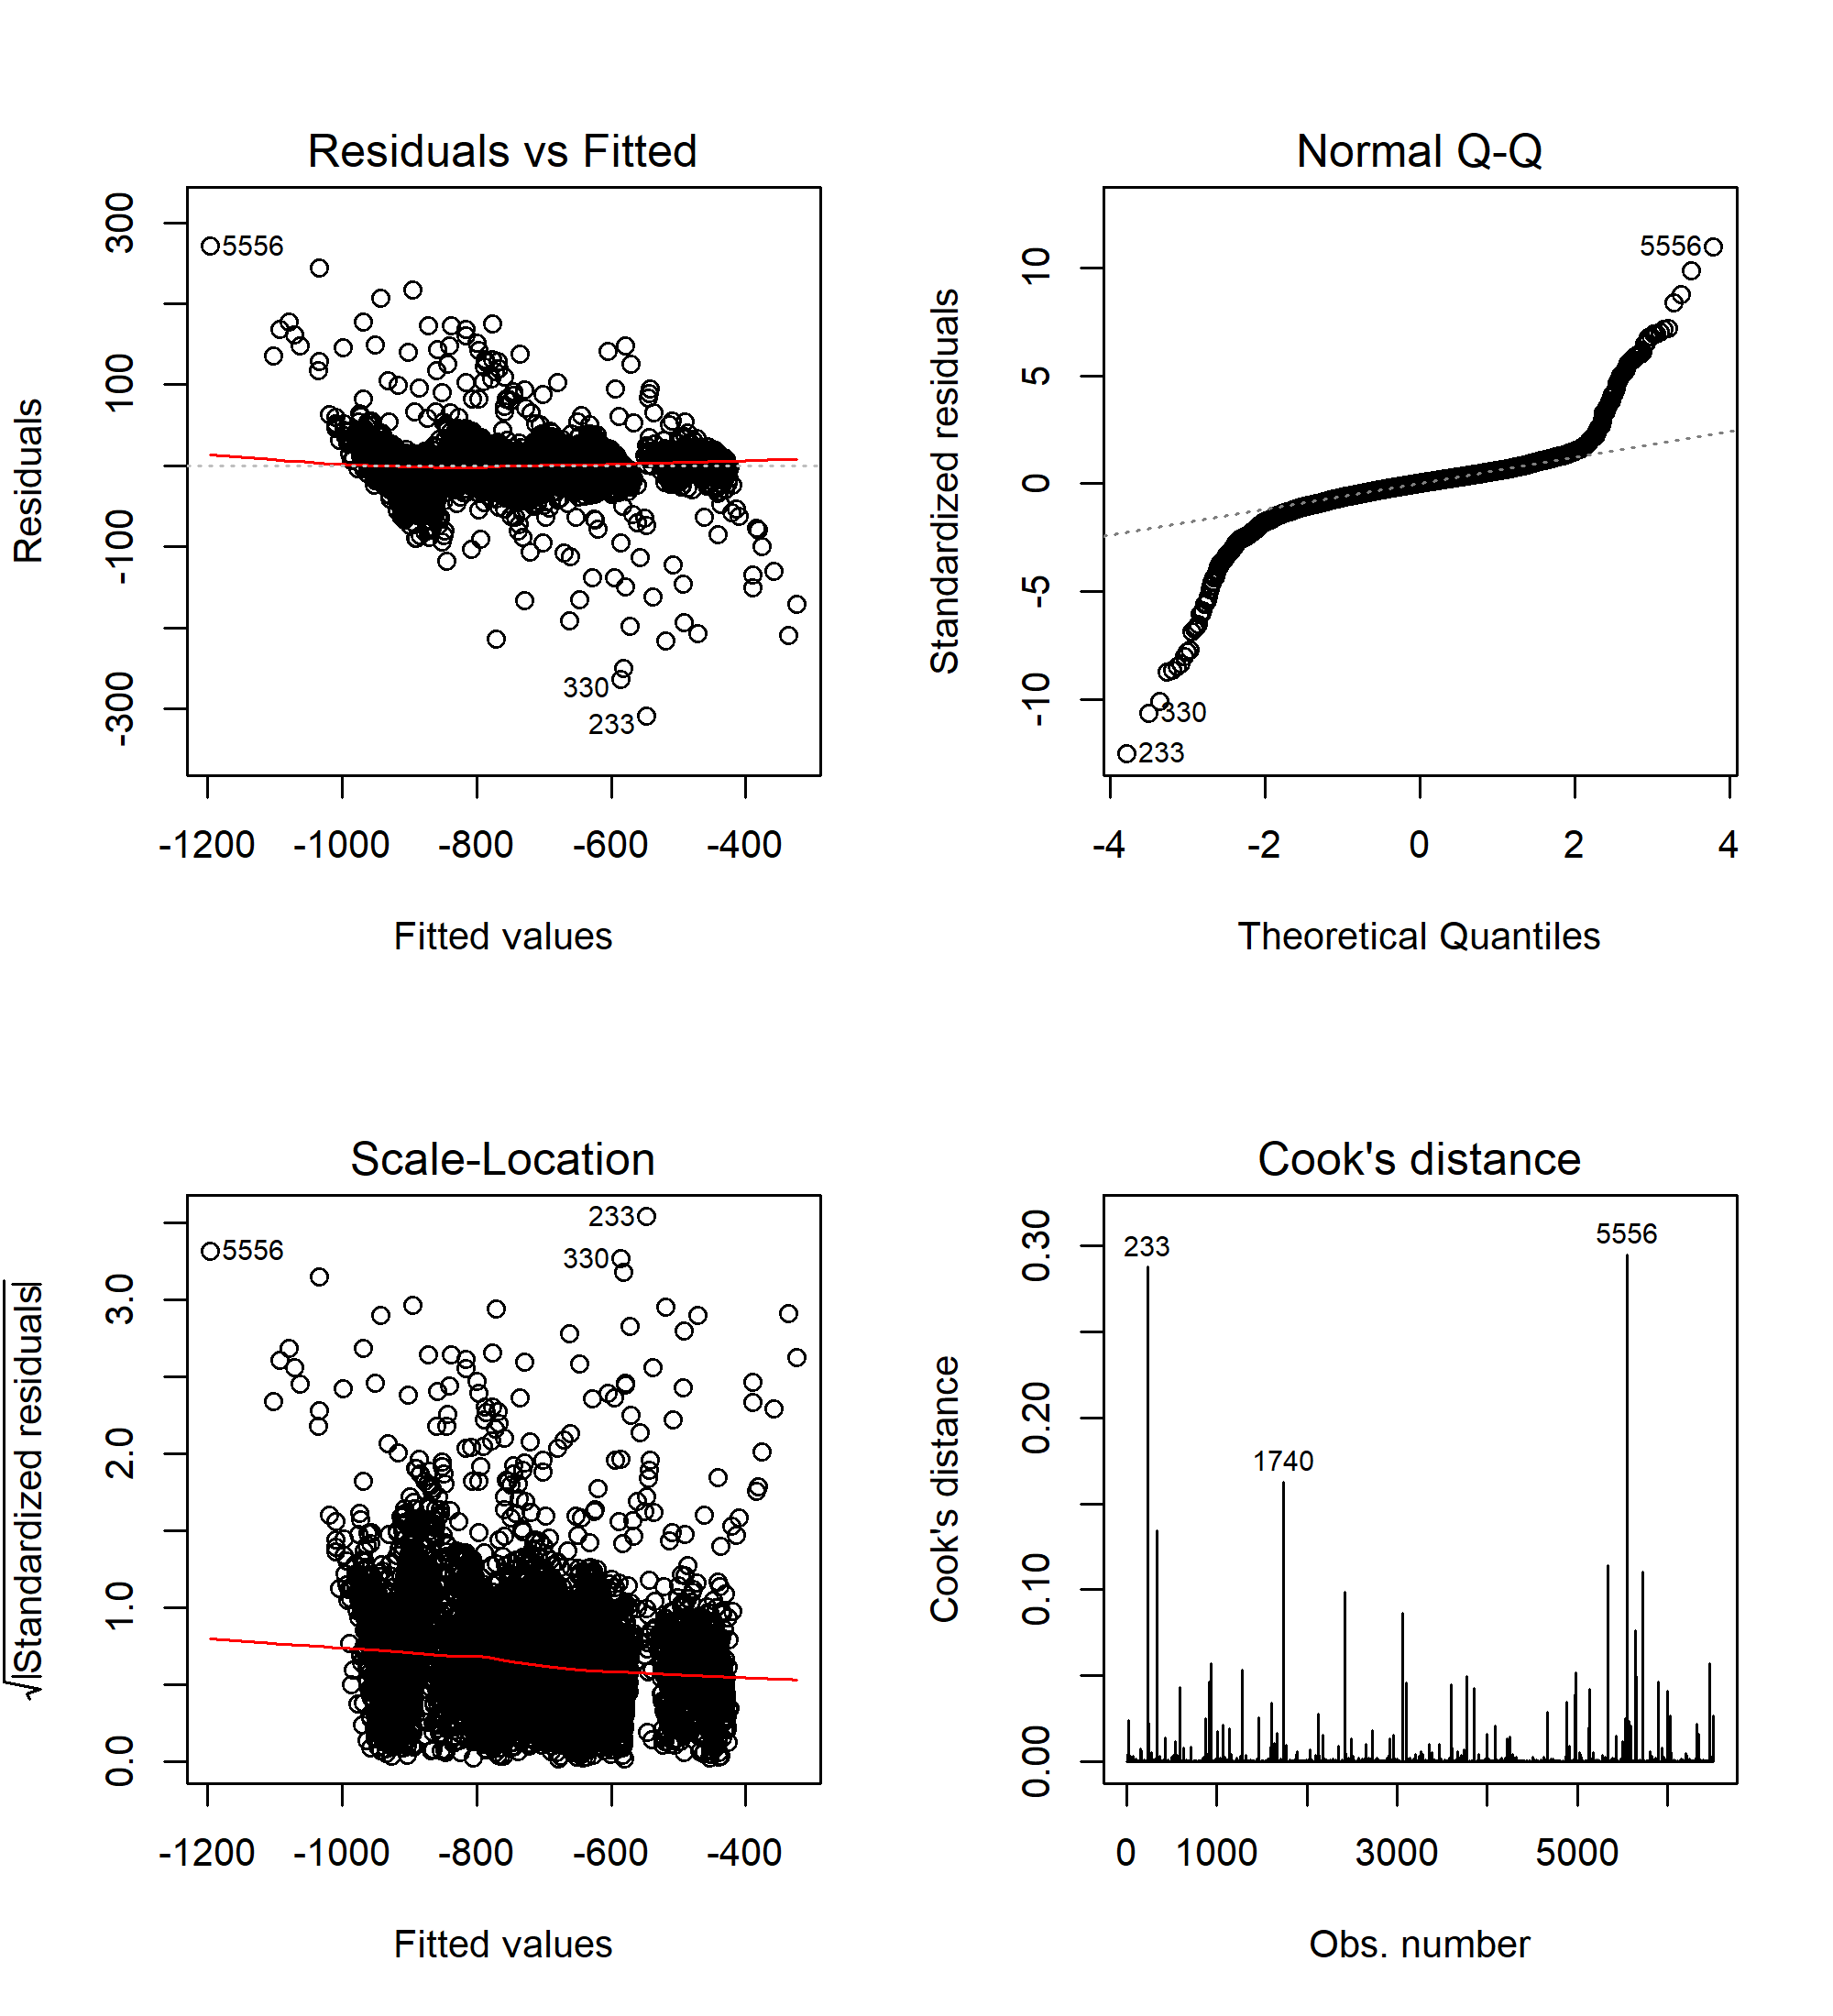

In [181]:
# MLR without nb                                      
img <- 'mlr_model_checks_without_nb.png'
png(img, width = 2000, height = 2200, res=300)
mlr <- lm(energy ~ na + naa + nab + nbb + mass + volume, data=newnano)
par(mfrow=c(2,2))
plot(mlr, which=1:4)
par(mfrow=c(1,1))
dev.off()
display_png(file=img) 

           Test stat Pr(>|Test stat|)    
na           -7.6144        3.025e-14 ***
naa          -5.4983        3.980e-08 ***
nab           6.2999        3.174e-10 ***
nbb           5.4171        6.274e-08 ***
mass         -3.2828         0.001033 ** 
volume        5.7053        1.213e-08 ***
Tukey test    6.7738        1.254e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


png 
  2

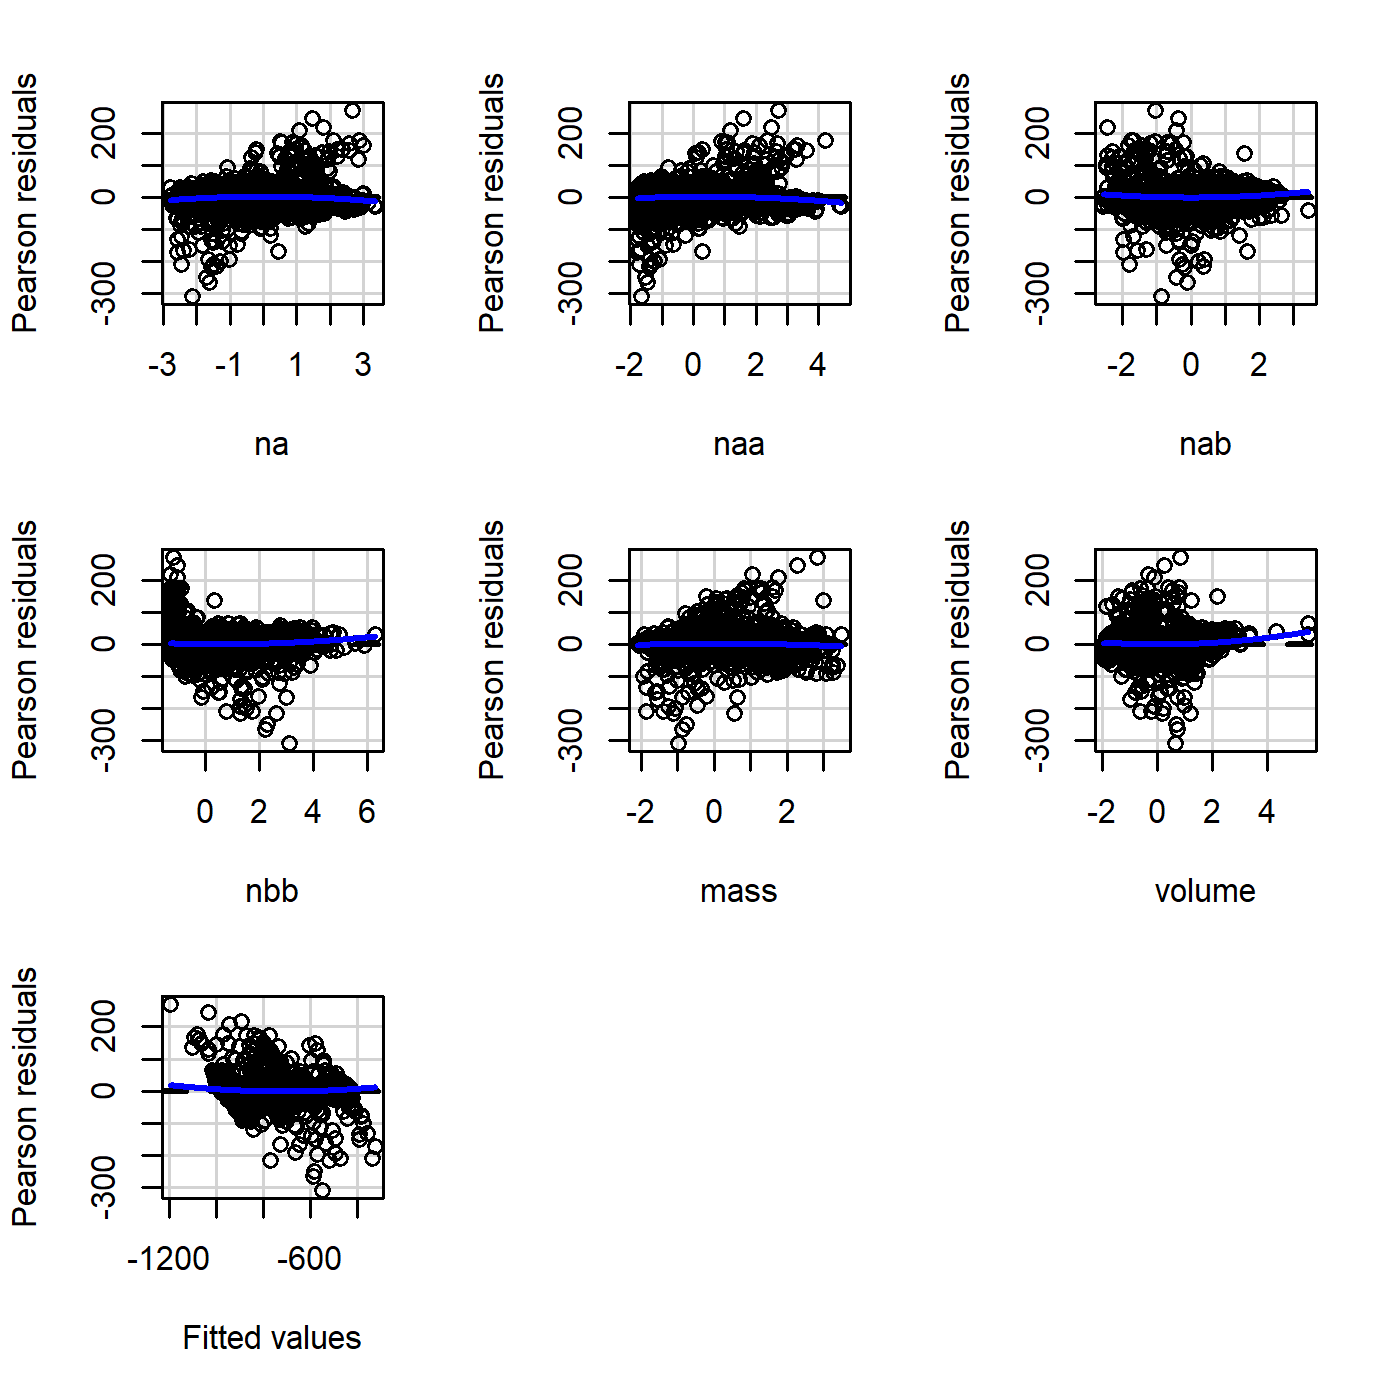

In [196]:
img <- 'mlr_linearity_checks_without_nb.png'
png(img, width = 1400, height = 1400, res=300)
residualPlots(mlr)
dev.off()
display_png(file=img) 

In [183]:
summary(mlr)


Call:
lm(formula = energy ~ na + naa + nab + nbb + mass + volume, data = newnano)

Residuals:
     Min       1Q   Median       3Q      Max 
-308.917   -9.887    0.815   10.290  270.897 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) -727.0213     0.3078 -2362.063  < 2e-16 ***
na          -112.9338     1.1157  -101.225  < 2e-16 ***
naa            7.0353     0.9162     7.678 1.85e-14 ***
nab          -19.5547     0.4818   -40.584  < 2e-16 ***
nbb          -47.6290     0.9014   -52.839  < 2e-16 ***
mass         -89.9102     0.9038   -99.478  < 2e-16 ***
volume        -8.9295     0.4573   -19.526  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.84 on 6506 degrees of freedom
Multiple R-squared:  0.9751,	Adjusted R-squared:  0.9751 
F-statistic: 4.252e+04 on 6 and 6506 DF,  p-value: < 2.2e-16


png 
  2

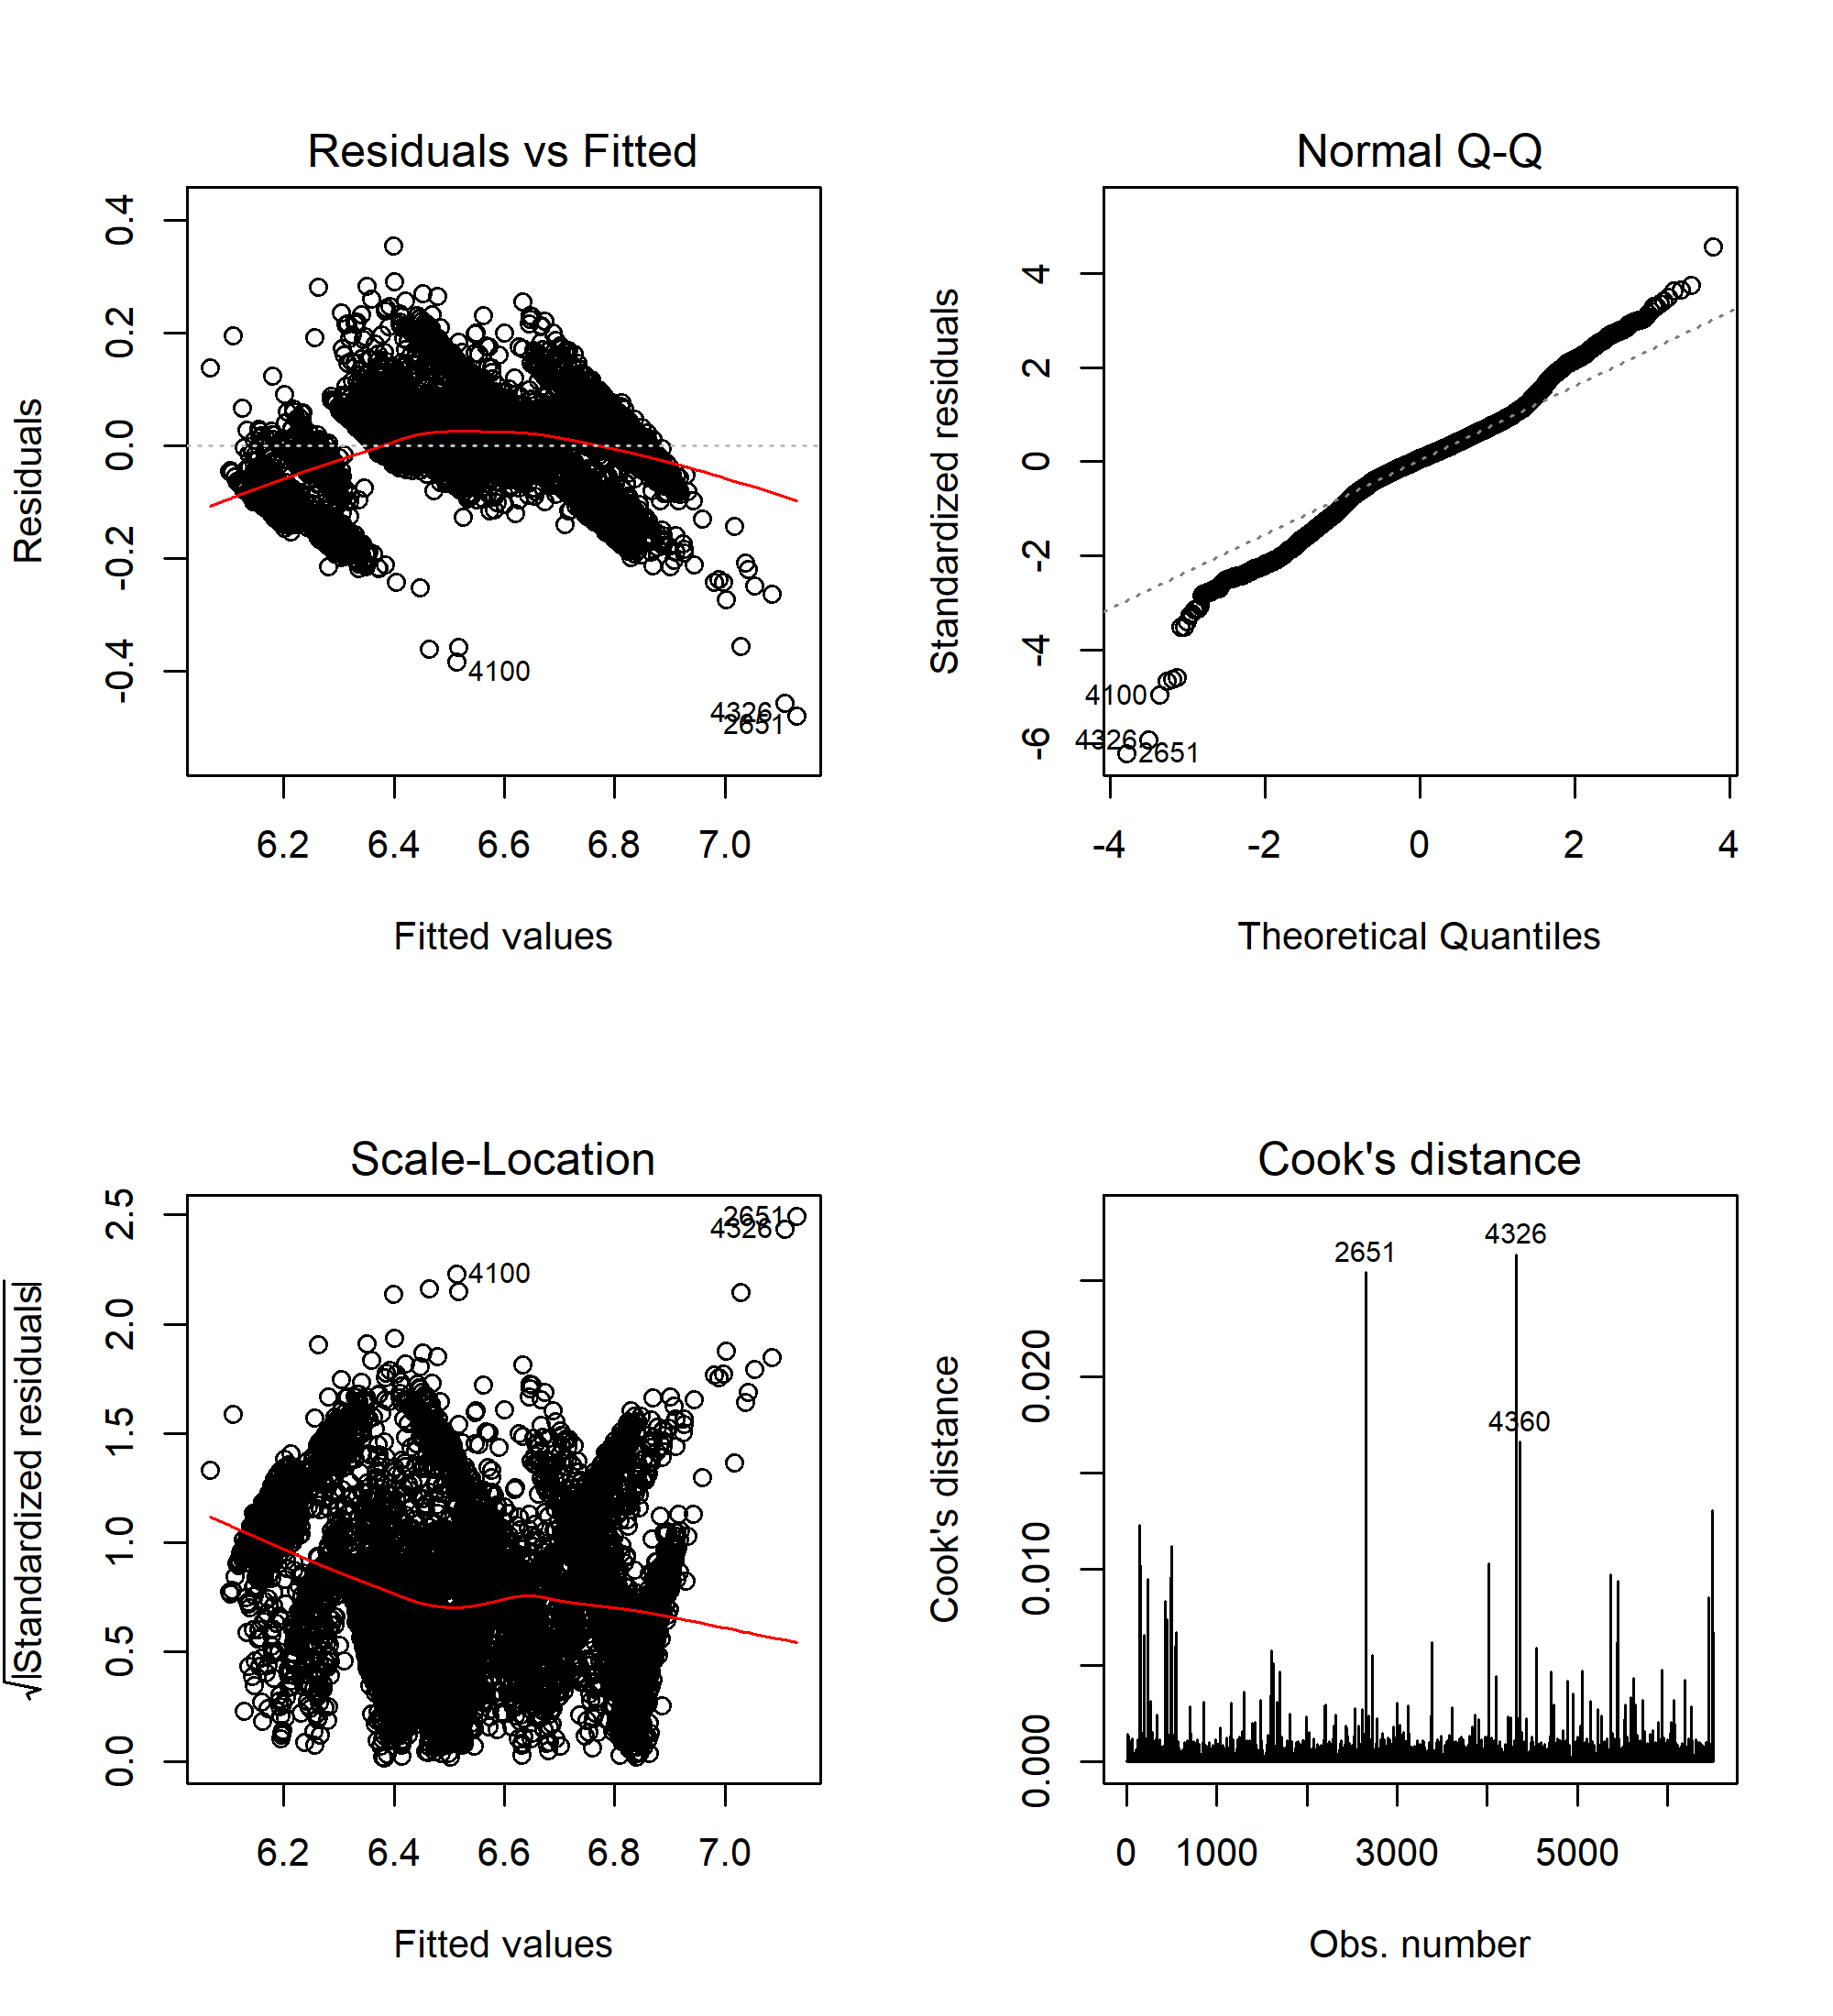

In [233]:
# MLR without nb                                      
img <- 'log_pcr_model_checks.png'
png(img, width = 2000, height = 2200, res=300)
logpcr <- lm(log(-nano$energy[-5570]) ~ ., as.data.frame(scores[,1:3]))
par(mfrow=c(2,2))
plot(logpcr, which=1:4)
par(mfrow=c(1,1))
dev.off()
display_png(file=img) 

In [160]:
install.packages('mgcv')


  There is a binary version available but the source version is later:
     binary source needs_compilation
mgcv 1.8-35 1.8-36              TRUE

  Binaries will be installed
package 'mgcv' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hansh\AppData\Local\Temp\RtmpEdhVro\downloaded_packages


Warning message:
"package 'mgcv' was built under R version 3.6.3"Loading required package: nlme
This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.


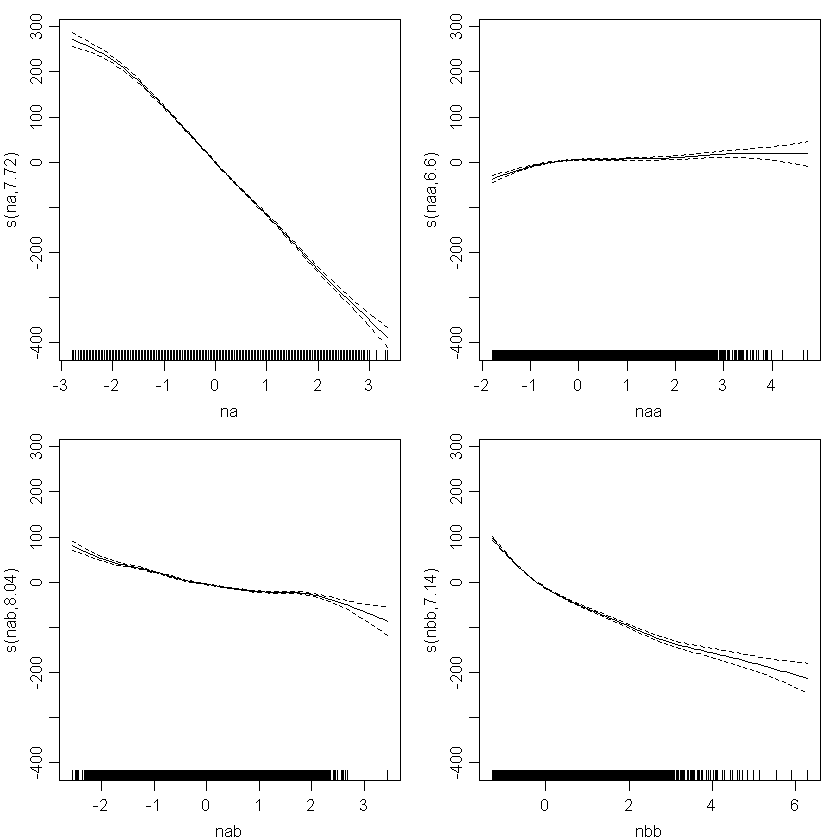

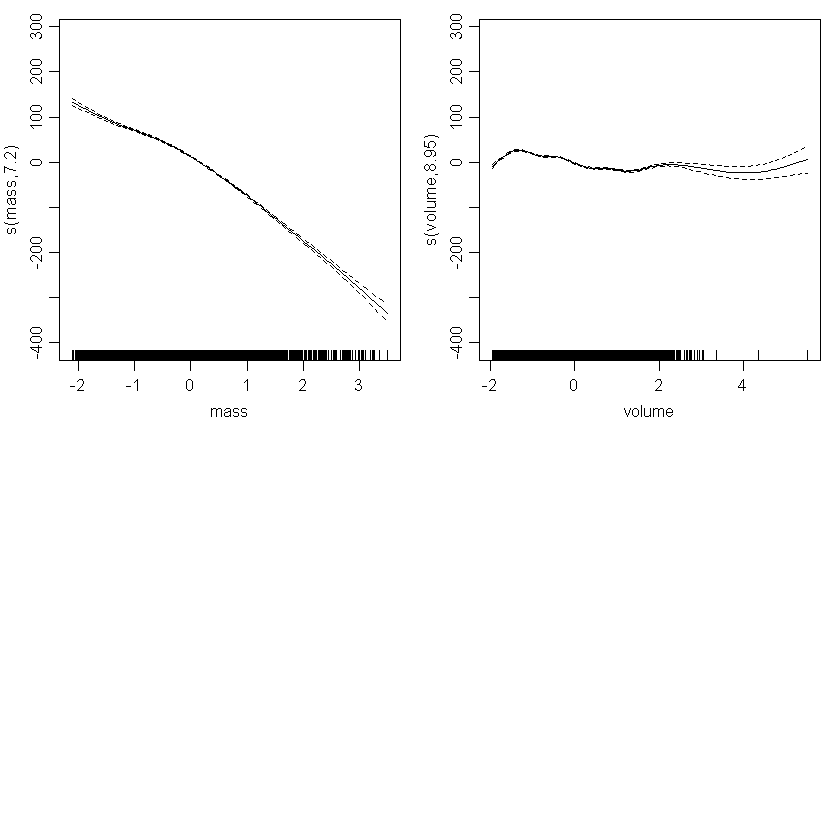

In [161]:
library(mgcv)
par(mfrow = c(2,2), mgp = c(2,0.7,0), mar =
c(3,3,1,1))
gam <- gam(energy ~ s(na) + s(naa) + s(nab) + s(nbb) + s(mass) + s(volume), data = newnano)
plot(gam)
par(mfrow = c(1,1))

In [194]:
nano[5570,]

na nb  naa  nab nbb mass     volume   energy   
5570 0  207 1705 0   0   40382.39 14458.63 -973.7262